<a href="https://colab.research.google.com/github/dipakpatil2001/Regression-Project-Retail_Sales_Prediction/blob/main/Regression_Project_Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

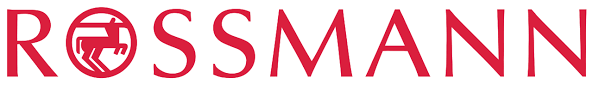

## **Project Name**   - Retail Sales Prediction on Rossmann Store.



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**            - Dipak Balram Patil

# **Project Summary -**

To build a sales price prediction model for Rossmann Stores, we will undertake the following steps:
1. Data Integration:

 Combine the Rossmann Stores Data with the Store Data to create a comprehensive dataset that includes store attributes along with sales data.
2. Data Cleaning:

 Handle missing values in the Store Data, either by imputation or removal, depending on the nature of the data.
 Ensure data types are appropriate for each feature, converting dates and categoricals as needed.
3. Feature Engineering:

  Derive new features that may have predictive power, such as time since competition opened, time since a store was remodeled, and indicators for promotions.
Encode categorical variables using one-hot encoding or label encoding.
4. Exploratory Data Analysis (EDA)
:

 Analyze sales trends over time to understand seasonality and other patterns.
Investigate the relationship between sales and other variables, such as promotions, store type, and competition.
5. Model Selection
:

 Choose appropriate machine learning models for regression, such as linear regression, random forest, or gradient boosting machines.
Consider time series models if the temporal aspect is significant.
6. Model Training and Validation
:

  Split the data into training and validation sets to evaluate model performance.
Use cross-validation to ensure the model's robustness.
7. Model Optimization
:

 Tune hyperparameters to improve model performance.
Feature selection to identify the most important predictors.
8. Model Evaluation:

 Assess the model using appropriate metrics, such as RMSE (Root Mean Square Error) for continuous sales predictions.

Each step will be executed with careful consideration of the data's characteristics and the business context of Rossmann Stores. The goal is to create a reliable and accurate model that can inform decision-making and strategy for the company's sales initiatives.


# **GitHub Link -**

Provide your GitHub Link here. https://github.com/dipakpatil2001/Regression-Project-Retail_Sales_Prediction

# **Problem Statement**


To develope the Machine Learning Regression Model to predicts the daily sales for up to six weeks in advance for 1115 Rossmann Stores across Europe. The model should take into account various factors that influence the sales such as promotions, competition, holidays, seasonality, locality, etc.

Our goal is to help Rossmann Store management make informed sales prediction so that they can manage various factors such as inventory management, staffinan g, and promotional strategies which will ultimately lead to increase in sales and profitability for the business.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

There have been given two datasets:
1. Rossmann Store Data.CSV
2. Store.CSV

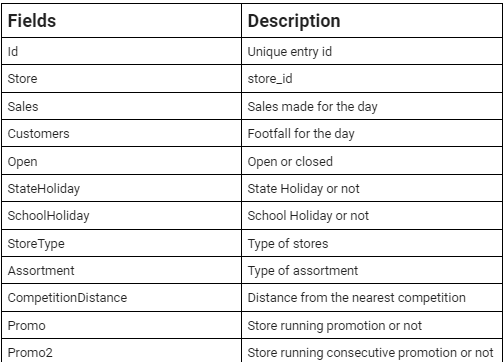

**These variables provide a comprehensive view of the sales data and store characteristics within the Rossmann dataset.**

### Import Libraries and define functions



In [144]:
pip install category_encoders


In [304]:
# Import Libraries
import numpy as np
import pandas as pd
from datetime import datetime as dt
import math

# To display all the columns in Dataframe
pd.set_option('display.max_columns', None)

# Import Data Visualisation Libraries
import matplotlib.pyplot as plt
import random
%matplotlib inline
import seaborn as sns
import plotly as pl
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pandas.plotting import scatter_matrix
from scipy.stats.mstats import winsorize
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


# Set the plot style and display options
plt.style.use('ggplot')
sns.set()

#to handle missing values
from sklearn.impute import SimpleImputer

# Machine Learning
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

#feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
# Import and Ignore warnings for better code readability,
import warnings
warnings.filterwarnings('ignore')
import pickle

In [146]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
# define a function to plot scatter plot between two features with regression line
# prints a scatter plot with regression line
def scatter_plot_with_regression_line(dataframe, x_feature, y_feature):
  plt.figure(figsize=(6,6))
  sns.scatterplot(x=x_feature, y=y_feature, data=dataframe)

  lin_fit = np.polyfit(dataframe[x_feature], dataframe[y_feature], 1)
  lin_func = np.poly1d(lin_fit)(dataframe[x_feature])
  plt.plot(dataframe[x_feature], lin_func, "r--", lw=1)

  plt.title(f"Correlation between {x_feature} and {y_feature}: {round(dataframe[x_feature].corr(dataframe[y_feature])*100, 2)}%")

In [148]:
# def plot_line_graph_with_two_features_over_time(dataframe, x_feature, y_feature, time, title):
def plot_line_graph_with_two_feature_over_time(dataframe, x_feature, y_feature, time, title):
    plt.figure(figsize=(24, 6))

    times = dataframe[time].unique()
    list_of_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    #   # plot each line graph
    for color_num, int_time in enumerate(times):
        temp_df = dataframe[dataframe[time] == int_time]
        temp_df = temp_df.groupby(x_feature)[y_feature].sum().reset_index()
        plt.plot(temp_df[x_feature], temp_df[y_feature], label=int_time, color=list_of_colors[color_num % len(list_of_colors)], marker="o")
        plt.xticks(range(1, dataframe[x_feature].max()+1))

    plt.title(f'{title} {y_feature} Over {time}s')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.legend()
    plt.show()

In [149]:
# define a function to calculate the vif of all features
# returns a dataframe
def calculate_vif_of_all_features(dataframe):
  temp_df = pd.DataFrame()
  temp_df['Feature'] = dataframe.columns
  temp_df['VIF'] = [variance_inflation_factor(dataframe.values, column_index) for column_index in range(dataframe.shape[1])]

  return temp_df

In [150]:
# define a function to plot bar graph with two features
# prints a bar graph
def plot_bar_graph_with_two_features(dataframe, x_feature, y_feature):
  if type(y_feature) == list:
    size = len(y_feature)
    fig, axes = plt.subplots(1, size, figsize=(10*size, 6))
    column = -1
    for feature in y_feature:
      column += 1
      sns.barplot(ax=axes[column], x=dataframe[x_feature], y=dataframe[feature], estimator=sum)
      axes[column].set_title(f"Sum of {feature} vs {x_feature}")
  else:
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=dataframe[x_feature], y=dataframe[y_feature], estimator=sum)
    ax.set_title(f"Sum of {y_feature} vs {x_feature}")
    plt.show()

In [151]:
# generate density plots of a feature in a dataframe
# prints a density plot
def density_plot_of_a_feature(dataframe, feature):
  plt.figure(figsize=(8, 6))
  sns.distplot(dataframe[feature])
  plt.show()

  # generate density plots of all features in a dataframe
# prints density plots
def density_plot_of_all_features(dataframe):
  columns = dataframe.describe().columns.tolist()

  columns_num = 3
  rows_num = math.ceil(len(columns)/columns_num)
  fig, axes = plt.subplots(rows_num, columns_num, figsize=(10*columns_num, 8*rows_num))

  row = -1
  column = columns_num - 1
  for feature in columns:
    if column == (columns_num - 1):
      row += 1
      column = 0
    else:
      column += 1
    sns.distplot(ax=axes[row, column], a=dataframe[feature])
    axes[row, column].set_title(f"{feature} Distribution")

  if len(columns) % columns_num != 0:
    for column_num in range(column + 1, columns_num):
      fig.delaxes(axes[rows_num - 1][column_num])

In [152]:
# generate scatter plots to check the linearity between sales and customers for each unique value in a feature
# plots scatter plots
def scatter_plot_bw_sales_customers_with_feature_unique_values(dataframe, feature):
  unique_values = sorted(dataframe[feature].unique().tolist())

  columns_num = 2
  rows_num = math.ceil(len(unique_values)/columns_num)
  fig, axes = plt.subplots(rows_num, columns_num, figsize=(10*columns_num, 8*rows_num))

  row = -1
  column = columns_num - 1
  for unique_value in unique_values:
    if column == (columns_num - 1):
      row += 1
      column = 0
    else:
      column += 1
    temp_df = dataframe[dataframe[feature] == unique_value]
    sns.scatterplot(ax=axes[row, column], x='Customers', y='Sales', data=temp_df)
    lin_fit = np.polyfit(temp_df['Customers'], temp_df['Sales'], 1)
    lin_func = np.poly1d(lin_fit)(temp_df['Customers'])
    axes[row, column].plot(temp_df['Customers'], lin_func, "r--", lw=1)
    axes[row, column].set_title(f"Sales vs Customers for {unique_value}\nCorrelation = {round(temp_df['Customers'].corr(temp_df['Sales'])*100, 2)}%")

  if len(unique_values) % columns_num != 0:
    for column_num in range(column + 1, columns_num):
      fig.delaxes(axes[rows_num - 1][column_num])

In [153]:
# define a function to generate horizontal box plot
# prints a box plot
def generate_horizontal_box_plot(dataframe, x_feature, y_feature=None):
  sns.set_theme(rc={'figure.figsize': (8,4)},style='whitegrid',palette='muted')
  if y_feature != None:
    ax = sns.boxplot(x=dataframe[x_feature], y=dataframe[y_feature])
  else:
    ax = sns.boxplot(x=dataframe[x_feature], y=None)
  ax.grid(False)

# define a function to generate vertical box plot
# prints a box plot
def generate_vertical_box_plot(dataframe, y_feature, x_feature=None):
  sns.set_theme(rc={'figure.figsize': (4,8)},style='whitegrid',palette='muted')
  if x_feature != None:
    ax = sns.boxplot(y=dataframe[y_feature], x=dataframe[x_feature])
  else:
    ax = sns.boxplot(y=dataframe[y_feature], x=None)
  ax.grid(False)

In [154]:
# define a function to calculate the upper and lower outlier boundary
# returns a tuple (upper_outlier_bound, lower_outlier_bound)
def get_outlier_boundaries(dataframe, column):
  percentile_25 = np.nanpercentile(dataframe[column],25)
  percentile_75 = np.nanpercentile(dataframe[column],75)
  iqr = (percentile_75 - percentile_25)
  upper_outlier_bound = percentile_75 + 1.5*iqr
  lower_outlier_bound = percentile_25 - 1.5*iqr

  return (upper_outlier_bound, lower_outlier_bound)

# define a function to calculate the number and percentage of outliers in a column
# returns a tuple (count, percentage)
def get_outlier_count_and_percentage(dataframe, column):
  # print(dataframe.shape[0])
  upper_outlier_bound, lower_outlier_bound = get_outlier_boundaries(dataframe, column)

  count = 0
  for value in dataframe[column]:
    if value > upper_outlier_bound or value < lower_outlier_bound:
      count += 1
  percentage = round(count/dataframe.shape[0]*100, 2)

  return (count, percentage)

In [301]:
# define a function to plot bar graph with three features
# prints a bar graph
def plot_bar_graph_with_three_features(dataframe, x_feature, y_feature, z_feature, y_label):
  plt.figure(figsize=(20, 10))

  X = dataframe[x_feature].tolist()
  Y = dataframe[y_feature].tolist()
  Z = dataframe[z_feature].tolist()

  X_axis_length = np.arange(len(X))

  plt.bar(X_axis_length - 0.2, Y, 0.4, label = y_feature)
  plt.bar(X_axis_length + 0.2, Z, 0.4, label = z_feature)

  min_limit = 0.9 * min(dataframe[y_feature].min(), dataframe[z_feature].min())
  max_limit = 1.1 * max(dataframe[y_feature].max(), dataframe[z_feature].max())
  plt.ylim(min_limit, max_limit)

  plt.xticks(X_axis_length, X)
  plt.xlabel(x_feature)
  plt.ylabel(y_label)
  plt.legend()
  plt.show()

### Dataset Loading

In [155]:
# Load the Rossmann Stores Data
rossmann_data = pd.read_csv('/content/drive/MyDrive/CD/Data science /Projects and all/Rossmann Stores Data.csv',index_col=0)
# Load the Store Data
store_data = pd.read_csv('/content/drive/MyDrive/CD/Data science /Projects and all/store.csv',index_col=0)

### Dataset First View

In [156]:
# Dataset First Look
rossmann_data.head()    #Rossmann Stores Data first 3 rows

DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
Store                                                                      
1              5  2015-07-31   5263        555     1      1            0   
2              5  2015-07-31   6064        625     1      1            0   
3              5  2015-07-31   8314        821     1      1            0   
4              5  2015-07-31  13995       1498     1      1            0   
5              5  2015-07-31   4822        559     1      1            0   

       SchoolHoliday  
Store                 
1                  1  
2                  1  
3                  1  
4                  1  
5                  1

In [157]:
rossmann_data.tail()    #Rossmann Stores Data last 3 rows

DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
Store                                                                      
1111           2  2013-01-01      0          0     0      0            a   
1112           2  2013-01-01      0          0     0      0            a   
1113           2  2013-01-01      0          0     0      0            a   
1114           2  2013-01-01      0          0     0      0            a   
1115           2  2013-01-01      0          0     0      0            a   

       SchoolHoliday  
Store                 
1111               1  
1112               1  
1113               1  
1114               1  
1115               1

In [158]:
store_data.head()    #Store Data first 3 rows

StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
Store                                                                        
1             c          a               1270.0                        9.0   
2             a          a                570.0                       11.0   
3             a          a              14130.0                       12.0   
4             c          c                620.0                        9.0   
5             a          a              29910.0                        4.0   

       CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
Store                                                                       
1                        2008.0       0              NaN              NaN   
2                        2007.0       1             13.0           2010.0   
3                        2006.0       1             14.0           2011.0   
4                        2009.0       0              NaN              NaN   
5                        2015.0       0              NaN              NaN   

         PromoInterval  
Store                   
1                  NaN  
2      Jan,Apr,Jul,Oct  
3      Jan,Apr,Jul,Oct  
4                  NaN  
5                  NaN

In [159]:
store_data.tail()    #Store Data last 3 rows

StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
Store                                                                        
1111          a          a               1900.0                        6.0   
1112          c          c               1880.0                        4.0   
1113          a          c               9260.0                        NaN   
1114          a          c                870.0                        NaN   
1115          d          c               5350.0                        NaN   

       CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
Store                                                                       
1111                     2014.0       1             31.0           2013.0   
1112                     2006.0       0              NaN              NaN   
1113                        NaN       0              NaN              NaN   
1114                        NaN       0              NaN              NaN   
1115                        NaN       1             22.0           2012.0   

          PromoInterval  
Store                    
1111    Jan,Apr,Jul,Oct  
1112                NaN  
1113                NaN  
1114                NaN  
1115   Mar,Jun,Sept,Dec

### Dataset Rows & Columns count

In [160]:
# Dataset Rows & Columns count
# Count the number of rows and columns for both datasets
rossmann_shape = rossmann_data.shape
store_shape = store_data.shape

# Display the shape of the datasets
print('Rossmann Stores Data shape:', rossmann_shape)
print('Store Data shape:', store_shape)

Rossmann Stores Data shape: (1017209, 8)
Store Data shape: (1115, 9)


**The Rossmann Stores Data contains 1,017,209 rows and 9 columns.**

**The Store Data comprises 1,115 rows and 10 columns.**

### Dataset Information

In [161]:
# Dataset Info
print('Rossmann Stores Data Info:')
print(rossmann_data.info())
print('\nStore Data Info:')
print(store_data.info())

Rossmann Stores Data Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 1 to 1115
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   DayOfWeek      1017209 non-null  int64 
 1   Date           1017209 non-null  object
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 69.8+ MB
None

Store Data Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 1 to 1115
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StoreType                  1115 non-null   object 
 1   Assortment                 1115 non-null   object 
 2   Compe

In [162]:
rossmann_data.describe()    #summary statistics for rossmann data

DayOfWeek         Sales     Customers          Open         Promo  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01  3.815145e-01   
std    1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01  4.857586e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00  0.000000e+00   
50%    4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00  0.000000e+00   
75%    6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00  1.000000e+00   
max    7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00  1.000000e+00   

       SchoolHoliday  
count   1.017209e+06  
mean    1.786467e-01  
std     3.830564e-01  
min     0.000000e+00  
25%     0.000000e+00  
50%     0.000000e+00  
75%     0.000000e+00  
max     1.000000e+00

In [163]:
store_data.describe()    #summary statistics for store data

CompetitionDistance  CompetitionOpenSinceMonth  \
count          1112.000000                 761.000000   
mean           5404.901079                   7.224704   
std            7663.174720                   3.212348   
min              20.000000                   1.000000   
25%             717.500000                   4.000000   
50%            2325.000000                   8.000000   
75%            6882.500000                  10.000000   
max           75860.000000                  12.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  Promo2SinceYear  
count                761.000000  1115.000000       571.000000       571.000000  
mean                2008.668857     0.512108        23.595447      2011.763573  
std                    6.195983     0.500078        14.141984         1.674935  
min                 1900.000000     0.000000         1.000000      2009.000000  
25%                 2006.000000     0.000000        13.000000      2011.000000  
50%                 2010.000000     1.000000        22.000000      2012.000000  
75%                 2013.000000     1.000000        37.000000      2013.000000  
max                 2015.000000     1.000000        50.000000      2015.000000

#### Duplicate Values

In [164]:
# Dataset Duplicate Value Count
rossmann_duplicates = rossmann_data.duplicated().sum()
store_duplicates = store_data.duplicated().sum()

# Display the number of duplicates
print('Number of duplicate rows in Rossmann Stores Data:', rossmann_duplicates)
print('Number of duplicate rows in Store Data:', store_duplicates)

Number of duplicate rows in Rossmann Stores Data: 172128
Number of duplicate rows in Store Data: 4


**There are no duplicate rows in either the Rossmann Stores Data or the Store Data.**

#### Missing Values/Null Values

In [165]:
## Missing Values/Null Values Count
def missing_value_count(df):
  return [print(f"There are {missing_values} missing values in {i}"  if (missing_values := df[i].isnull().sum()) >=1 else f"There are 0 missing values in {i}") for i in df.columns]


In [166]:
# Missing Values/Null Values Count
rossmann_data.isnull().sum()

DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [167]:
store_data.isnull().sum()

StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


**The Rossmann Stores Data does not have any missing values across its columns. However, the Store Data has some missing values**

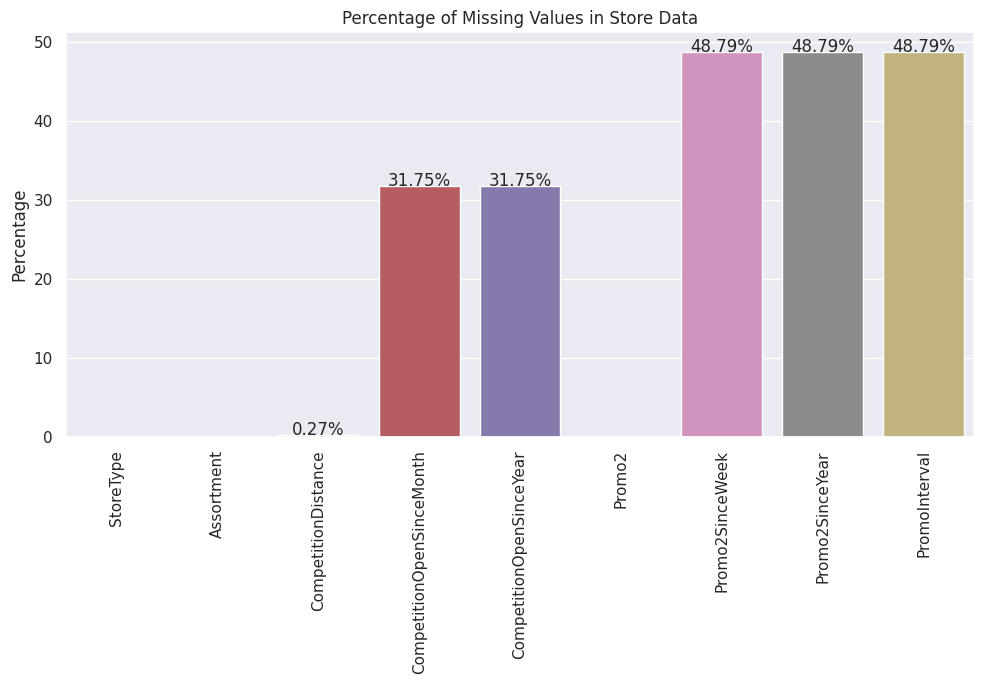

In [168]:
# Visualizing the missing values
# Calculate the percentage of missing values for each column
store_missing_percentage = store_data.isnull().mean() * 100

# Create a bar plot for the missing values percentage
plt.figure(figsize=(10, 7))
sns.barplot(x=store_missing_percentage.index, y=store_missing_percentage.values)
plt.title('Percentage of Missing Values in Store Data')
plt.ylabel('Percentage')
plt.xticks(rotation=90)

# Adding annotations on top of the bars
for index, value in enumerate(store_missing_percentage.values):
    if value > 0: # Only annotate bars with missing values
        plt.text(index, value, f'{value:.2f}%', ha='center')
plt.tight_layout()
plt.show()

Six out of 10 columns in store data have missing values in them. They must be handled properly inorder to get an accurate result.



CompetitionDistance is a numerical feature. Lets check its density plot to choose the value we need to impute missing values.



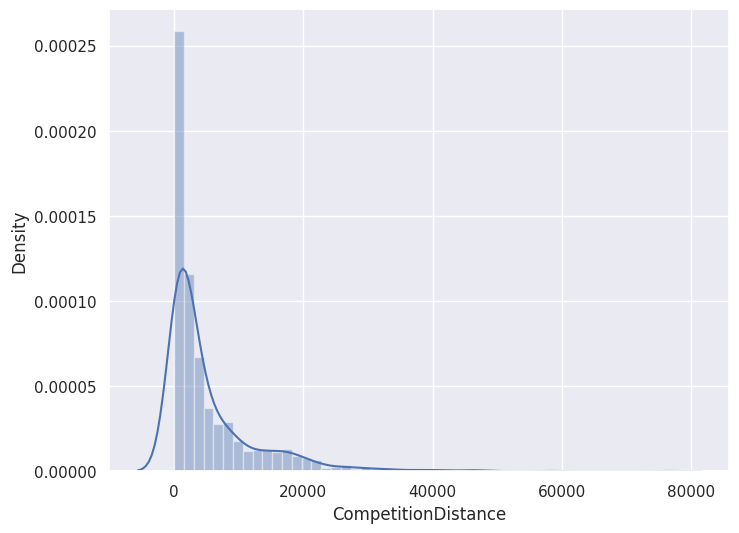

In [169]:
# create a density plot to show the distribution of values in CompetitionDistance
density_plot_of_a_feature(store_data, 'CompetitionDistance')

The distribution of CompetitionDistance is positively skewed. So it is safe to impute missing values with mode or median. Since the PDF of the peak of the distribution is very low, it is better to go with median instead of mode.

In [170]:
# filling the missing values with median
store_data["CompetitionDistance"].fillna(value = store_data.CompetitionDistance.median(), inplace=True)

Both CompetitionOpenSinceMonth and CompetitionOpenSinceYear have the same number of missing values. This may mean that both the features have missing values in the same rows.

In [171]:
count = 0
for index, row in store_data.iterrows():
  if np.isnan(row["CompetitionOpenSinceMonth"]) and np.isnan(row["CompetitionOpenSinceYear"]):
    count += 1
print(count)

354


So, both the features have missing values in the same rows. Now lets check if its related to CompetitionDistance.

In [172]:
# show CompetitionDistance, CompetitionOpenSinceMonth and CompetitionOpenSinceYear for rows
# where CompetitionOpenSinceMonth and CompetitionOpenSinceYear have missing values
store_data[np.isnan(store_data["CompetitionOpenSinceMonth"])].loc[:, ["CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]]

CompetitionDistance  CompetitionOpenSinceMonth  \
Store                                                   
12                  1070.0                        NaN   
13                   310.0                        NaN   
16                  3270.0                        NaN   
19                  3240.0                        NaN   
22                  1040.0                        NaN   
...                    ...                        ...   
1096                1130.0                        NaN   
1100                 540.0                        NaN   
1113                9260.0                        NaN   
1114                 870.0                        NaN   
1115                5350.0                        NaN   

       CompetitionOpenSinceYear  
Store                            
12                          NaN  
13                          NaN  
16                          NaN  
19                          NaN  
22                          NaN  
...                         ...  
1096                        NaN  
1100                        NaN  
1113                        NaN  
1114                        NaN  
1115                        NaN  

[354 rows x 3 columns]

Since no useful information was obtained from the above process, lets impute missing values with the most frequent values.

In [173]:
# filling the missing values with mode
store_data["CompetitionOpenSinceMonth"].fillna(value = store_data.CompetitionOpenSinceMonth.mode()[0], inplace=True)
store_data["CompetitionOpenSinceYear"].fillna(value = store_data.CompetitionOpenSinceYear.mode()[0], inplace=True)

Promo2SinceWeek, Promo2SinceYear and PromoInterval have the same number of missing values. This may indicate that these features have missing values in the same rows.

In [174]:
# check if Promo2SinceWeek, Promo2SinceYear and PromoInterval have missing values in the same rows
count = 0
for index, row in store_data.iterrows():
  if np.isnan(row["Promo2SinceWeek"]) and np.isnan(row["Promo2SinceYear"]) and np.isnan(row["PromoInterval"]):
    count += 1
print(count)

544


So, these features have missing values in the same rows. Now lets check if its related to Promo2.

In [175]:
# show Promo2, Promo2SinceWeek, Promo2SinceYear and PromoInterval for rows
# where Promo2SinceWeek, Promo2SinceYear and PromoInterval have missing values
store_data[np.isnan(store_data["Promo2SinceWeek"])].loc[:, ["Promo2", "Promo2SinceWeek", "Promo2SinceYear", "PromoInterval"]]

Promo2  Promo2SinceWeek  Promo2SinceYear PromoInterval
Store                                                        
1           0              NaN              NaN           NaN
4           0              NaN              NaN           NaN
5           0              NaN              NaN           NaN
6           0              NaN              NaN           NaN
7           0              NaN              NaN           NaN
...       ...              ...              ...           ...
1108        0              NaN              NaN           NaN
1110        0              NaN              NaN           NaN
1112        0              NaN              NaN           NaN
1113        0              NaN              NaN           NaN
1114        0              NaN              NaN           NaN

[544 rows x 4 columns]

Promo2 value of head and tail of the above dataframe is 0. Lets check whether missing values in Promo2SinceWeek, Promo2SinceYear and PromoInterval is due to 0 in Promo2.

In [176]:
# show the count of each unique value in Promo2
store_data["Promo2"].value_counts()

1    571
0    544
Name: Promo2, dtype: int64

So, missing values in Promo2SinceWeek, Promo2SinceYear and PromoInterval is due to 0 in Promo2. Lets impute missing values with 0.

In [177]:
# filling the missing values with value 0
store_data["Promo2SinceWeek"].fillna(value = 0, inplace=True)
store_data["Promo2SinceYear"].fillna(value = 0, inplace=True)
store_data["PromoInterval"].fillna(value = 0, inplace=True)

In [178]:
# Now let us check number of missing values in the store data
missing_value_count(store_data)

There are 0 missing values in StoreType
There are 0 missing values in Assortment
There are 0 missing values in CompetitionDistance
There are 0 missing values in CompetitionOpenSinceMonth
There are 0 missing values in CompetitionOpenSinceYear
There are 0 missing values in Promo2
There are 0 missing values in Promo2SinceWeek
There are 0 missing values in Promo2SinceYear
There are 0 missing values in PromoInterval


[None, None, None, None, None, None, None, None, None]

### What did you know about your dataset?

Based on the analysis conducted so far on the Rossmann Stores Data and the Store Data, here's a summary of key insights:

**Data Completeness**
 * The Rossmann Stores Data is complete with no missing values. The Store Data, however, has missing values in several columns related to competition and promotions.

**Duplicates:**
 * There are no duplicate rows in either dataset, indicating that each entry is unique.

**Missing Values Visualization:**
 * The annotated bar plot for the Store Data indicates that some columns had a significant percentage of missing values, particularly "CompetitionOpenSinceMonth" and "CompetitionOpenSinceYear".

These insights provide a foundational understanding of the datasets' structure and integrity, which is crucial for any further analysis or predictive modeling.

## ***2. Understanding Your Variables***

In [179]:
# Dataset rows and columns
print('Rossmann Stores Data shape:', rossmann_shape)
print('Store Data shape:', store_shape)

Rossmann Stores Data shape: (1017209, 8)
Store Data shape: (1115, 9)


In [180]:
# Dataset columns
print("Number of columns in Rossmann data:",len(rossmann_data.columns))
print("column names in Rossmann data:",list(rossmann_data.columns))
print("-----------------------------------------------------------")
print("Number of columns in Store data:",len(store_data.columns))
print("column names in Store data:",list(store_data.columns))

Number of columns in Rossmann data: 8
column names in Rossmann data: ['DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
-----------------------------------------------------------
Number of columns in Store data: 9
column names in Store data: ['StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [181]:
# Dataset describe - Rossmann data
rossmann_data.describe(include = 'all') #Summary statistics for Rossmann data

DayOfWeek        Date         Sales     Customers          Open  \
count   1.017209e+06     1017209  1.017209e+06  1.017209e+06  1.017209e+06   
unique           NaN         942           NaN           NaN           NaN   
top              NaN  2015-07-31           NaN           NaN           NaN   
freq             NaN        1115           NaN           NaN           NaN   
mean    3.998341e+00         NaN  5.773819e+03  6.331459e+02  8.301067e-01   
std     1.997391e+00         NaN  3.849926e+03  4.644117e+02  3.755392e-01   
min     1.000000e+00         NaN  0.000000e+00  0.000000e+00  0.000000e+00   
25%     2.000000e+00         NaN  3.727000e+03  4.050000e+02  1.000000e+00   
50%     4.000000e+00         NaN  5.744000e+03  6.090000e+02  1.000000e+00   
75%     6.000000e+00         NaN  7.856000e+03  8.370000e+02  1.000000e+00   
max     7.000000e+00         NaN  4.155100e+04  7.388000e+03  1.000000e+00   

               Promo StateHoliday  SchoolHoliday  
count   1.017209e+06      1017209   1.017209e+06  
unique           NaN            5            NaN  
top              NaN            0            NaN  
freq             NaN       855087            NaN  
mean    3.815145e-01          NaN   1.786467e-01  
std     4.857586e-01          NaN   3.830564e-01  
min     0.000000e+00          NaN   0.000000e+00  
25%     0.000000e+00          NaN   0.000000e+00  
50%     0.000000e+00          NaN   0.000000e+00  
75%     1.000000e+00          NaN   0.000000e+00  
max     1.000000e+00          NaN   1.000000e+00

In [182]:
# Dataset Describe - Store data
store_data.describe(include = 'all') #Summary statistics for Store data

StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
count       1115       1115          1115.000000                1115.000000   
unique         4          3                  NaN                        NaN   
top            a          a                  NaN                        NaN   
freq         602        593                  NaN                        NaN   
mean         NaN        NaN          5396.614350                   7.788341   
std          NaN        NaN          7654.513635                   2.779130   
min          NaN        NaN            20.000000                   1.000000   
25%          NaN        NaN           720.000000                   6.000000   
50%          NaN        NaN          2325.000000                   9.000000   
75%          NaN        NaN          6875.000000                   9.000000   
max          NaN        NaN         75860.000000                  12.000000   

        CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  \
count                1115.000000  1115.000000      1115.000000   
unique                       NaN          NaN              NaN   
top                          NaN          NaN              NaN   
freq                         NaN          NaN              NaN   
mean                 2010.043946     0.512108        12.083408   
std                     5.500844     0.500078        15.542241   
min                  1900.000000     0.000000         0.000000   
25%                  2008.000000     0.000000         0.000000   
50%                  2012.000000     1.000000         1.000000   
75%                  2013.000000     1.000000        22.000000   
max                  2015.000000     1.000000        50.000000   

        Promo2SinceYear  PromoInterval  
count       1115.000000         1115.0  
unique              NaN            4.0  
top                 NaN            0.0  
freq                NaN          544.0  
mean        1030.239462            NaN  
std         1006.038782            NaN  
min            0.000000            NaN  
25%            0.000000            NaN  
50%         2009.000000            NaN  
75%         2012.000000            NaN  
max         2015.000000            NaN

### Variables Description

The datasets contain the following variables:

**Rossmann Stores Data:**
1. Store: An identifier for each store.
2. DayOfWeek: The day of the week represented numerically.
3. Date: The date of sales data.
4. Sales: The turnover for any given day (**this is what you are predicting**).
5. Customers: The number of customers on a given day.
6. Open: An indicator for whether the store was open: 0 = closed, 1 = open.
7. Promo: Indicates whether a store is running a promo on that day.
8. StateHoliday: Indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays.
9. SchoolHoliday: Indicates if the (Store, Date) was affected by the closure of public schools.

**Store Data:**

1. Store: An identifier for each store.
2. StoreType: Differentiates between 4 different store models: a, b, c, d.
3. Assortment: Describes an assortment level: a = basic, b = extra, c = extended.
4. CompetitionDistance: Distance in meters to the nearest competitor store.
5. CompetitionOpenSinceMonth: Gives the approximate month of the time the nearest competitor was opened.
6. CompetitionOpenSinceYear: Gives the approximate year of the time the nearest competitor was opened.
7. Promo2: Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating.
8. Promo2SinceWeek: Describes the calendar week when the store started participating in Promo2.
9. Promo2SinceYear: Describes the year when the store started participating in Promo2.
10. PromoInterval: Describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g., "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store.

**These variables provide a comprehensive view of the sales data and store characteristics within the Rossmann dataset.**

### Check Unique Values for each variable.

In [183]:
# Check Unique Values for each variable.
print(rossmann_data.nunique())
print("-----------------------------------------")
print(store_data.nunique())

DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64
-----------------------------------------
StoreType                      4
Assortment                     3
CompetitionDistance          655
CompetitionOpenSinceMonth     12
CompetitionOpenSinceYear      23
Promo2                         2
Promo2SinceWeek               25
Promo2SinceYear                8
PromoInterval                  4
dtype: int64


In [184]:
rossmann_data.apply(lambda x: x.unique())

DayOfWeek                                    [5, 4, 3, 2, 1, 7, 6]
Date             [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
Sales            [5263, 6064, 8314, 13995, 4822, 5651, 15344, 8...
Customers        [555, 625, 821, 1498, 559, 589, 1414, 833, 687...
Open                                                        [1, 0]
Promo                                                       [1, 0]
StateHoliday                                       [0, a, b, c, 0]
SchoolHoliday                                               [1, 0]
dtype: object

In [185]:
store_data.apply(lambda x: x.unique())

StoreType                                                         [c, a, d, b]
Assortment                                                           [a, c, b]
CompetitionDistance          [1270.0, 570.0, 14130.0, 620.0, 29910.0, 310.0...
CompetitionOpenSinceMonth    [9.0, 11.0, 12.0, 4.0, 10.0, 8.0, 3.0, 6.0, 5....
CompetitionOpenSinceYear     [2008.0, 2007.0, 2006.0, 2009.0, 2015.0, 2013....
Promo2                                                                  [0, 1]
Promo2SinceWeek              [0.0, 13.0, 14.0, 1.0, 45.0, 40.0, 26.0, 22.0,...
Promo2SinceYear              [0.0, 2010.0, 2011.0, 2012.0, 2009.0, 2014.0, ...
PromoInterval                [0, Jan,Apr,Jul,Oct, Feb,May,Aug,Nov, Mar,Jun,...
dtype: object

The null values have been filled with **zeros** in dataset. This approach was chosen to maintain the integrity of the data and avoid any potential bias that might be introduced by using the median.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [186]:
store_data.shape

(1115, 9)

In [187]:
rossmann_data.shape

(1017209, 8)

In [188]:
# Write your code to make your dataset analysis ready.
# Merge the datasets into a single dataframe using how='left'
total_df = pd.merge(rossmann_data, store_data, on='Store', how='left').reset_index()
total_df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                       11.0                    2007.0       1   
2                       12.0                    2006.0       1   
3                        9.0                    2009.0       0   
4                        4.0                    2015.0       0   

   Promo2SinceWeek  Promo2SinceYear    PromoInterval  
0              0.0              0.0                0  
1             13.0           2010.0  Jan,Apr,Jul,Oct  
2             14.0           2011.0  Jan,Apr,Jul,Oct  
3              0.0              0.0                0  
4              0.0              0.0                0

The datasets have now been merged using how="left", which includes all records from the Rossmann Stores Data and the matching records from the Store Data. The head of this left-joined dataframe is displayed above.

In [189]:
print("Shape of the Total dataframe: ",total_df.shape)
print(total_df.dtypes)

Shape of the Total dataframe:  (1017209, 18)
Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object


In [190]:
# Identify categorical values in columns with data type as object
obj_dtype = ['StateHoliday','StoreType','Assortment','PromoInterval']
for i in obj_dtype:
  print(i)
  print(total_df[i].unique())
  print("----------------------")

StateHoliday
['0' 'a' 'b' 'c' 0]
----------------------
StoreType
['c' 'a' 'd' 'b']
----------------------
Assortment
['a' 'c' 'b']
----------------------
PromoInterval
[0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
----------------------


#Categorical Encoding

In [191]:
# Convert 'Date' column to datetime format
total_df['Date'] = pd.to_datetime(total_df['Date'], format = '%Y-%m-%d')

# Mapping for StateHoliday
state_holiday_map = {'a': 1, 'b': 1, 'c': 1, '0': 0}
total_df['StateHoliday'] = total_df['StateHoliday'].map(state_holiday_map)

In [192]:
# convert CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear
# from float to int
total_df = total_df.astype({"CompetitionOpenSinceMonth":int, "CompetitionOpenSinceYear":int, "Promo2SinceWeek":int, "Promo2SinceYear":int})

print(total_df.dtypes)

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                        float64
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth             int64
CompetitionOpenSinceYear              int64
Promo2                                int64
Promo2SinceWeek                       int64
Promo2SinceYear                       int64
PromoInterval                        object
dtype: object


## Manipulation of Columns

In [193]:
# Extract year, month, and day as integers
total_df['Date'] = pd.to_datetime(total_df['Date'])
total_df['Year'] = total_df['Date'].dt.year
total_df['Month'] = total_df['Date'].dt.month
total_df['WeekOfYear'] = total_df['Date'].dt.week

In [194]:
total_df['WeekOfYear'].nunique()

52

In [195]:
# create a new feature which shows the number of months passed since competition started
total_df['CompetitionOpenNumMonths'] = (total_df['Year'] - total_df['CompetitionOpenSinceYear']) * 12 + (total_df['Month'] - total_df['CompetitionOpenSinceMonth'])

# create a new feature which shows the number of weeks passed since promo 2 started
total_df['Promo2NumWeeks'] = (total_df['Year'] - total_df['Promo2SinceYear']) * 52 + (total_df['WeekOfYear'] - total_df['Promo2SinceWeek'])

In [196]:
total_df['StateHoliday'].value_counts()    # Dataframe view after converting categorical values into numerical values

0.0    855087
1.0     31050
Name: StateHoliday, dtype: int64

Lets check the CompetitionOpenNumMonths for any irregularities


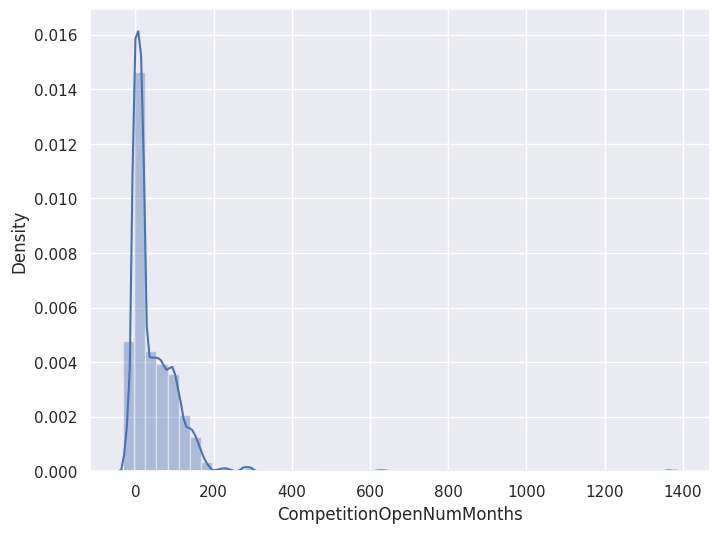

In [197]:
# check the distribution of CompetitionOpenNumMonths
density_plot_of_a_feature(total_df, 'CompetitionOpenNumMonths')

Negative values for CompetitionOpenNumMonths are not acceptable. Lets check why negative values occured.

In [198]:
# dataset for negative CompetitionOpenNumMonths
total_df[total_df['CompetitionOpenNumMonths'] < 0].loc[:, ['CompetitionOpenNumMonths','Sales', 'WeekOfYear', 'Year', 'Promo2SinceWeek', 'Promo2SinceYear', 'Promo2NumWeeks']]

CompetitionOpenNumMonths  Sales  WeekOfYear  Year  Promo2SinceWeek  \
687                            -1   5107          31  2015               14   
1019                           -1  10734          31  2015                0   
1071                           -1  10270          31  2015                5   
1802                           -1   4188          31  2015               14   
2134                           -1   8020          31  2015                0   
...                           ...    ...         ...   ...              ...   
1017193                        -8      0           1  2013               14   
1017204                       -17      0           1  2013               31   
1017206                        -8      0           1  2013                0   
1017207                        -8      0           1  2013                0   
1017208                        -8      0           1  2013               22   

         Promo2SinceYear  Promo2NumWeeks  
687                 2011             225  
1019                   0          104811  
1071                2010             286  
1802                2011             225  
2134                   0          104811  
...                  ...             ...  
1017193             2011              91  
1017204             2013             -30  
1017206                0          104677  
1017207                0          104677  
1017208             2012              31  

[170688 rows x 7 columns]

Some values are negative because in some observations, the competition has not opened when the sales was recorded. Lets change all negative values to 0.

In [199]:
# change negative values of CompetitionOpenNumMonths to 0
total_df['CompetitionOpenNumMonths'] = total_df['CompetitionOpenNumMonths'].apply(lambda x: 0 if x < 0 else x)

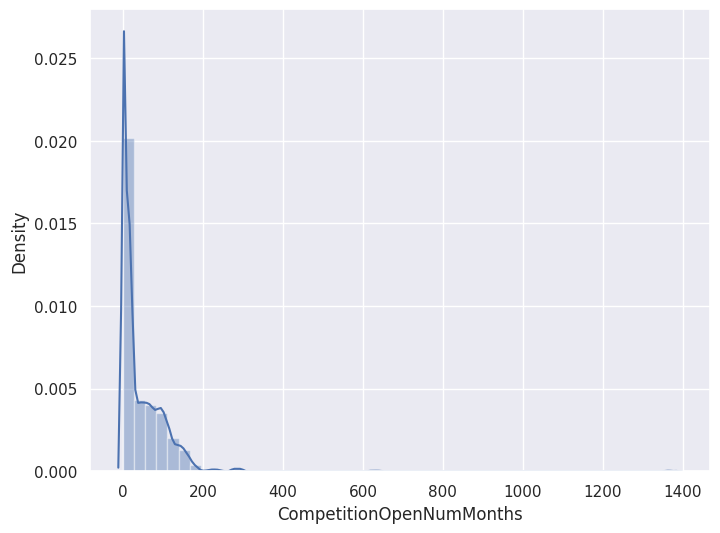

In [200]:
# check the distribution of CompetitionOpenNumMonths
density_plot_of_a_feature(total_df, 'CompetitionOpenNumMonths')

Lets check the CompetitionOpenNumMonths for any irregularities.

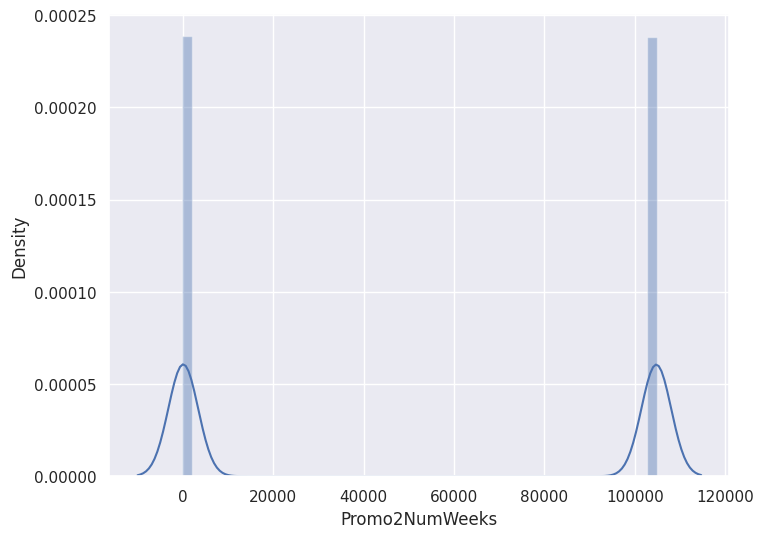

In [201]:
# check the distribution of Promo2NumWeeks
density_plot_of_a_feature(total_df, 'Promo2NumWeeks')

Such large values of Promo2NumWeeks are not possible. Lets check why it occured.

In [202]:
# dataset for very large Promo2NumWeeks values
total_df[total_df['Promo2NumWeeks'] > 100000].loc[:, ['WeekOfYear', 'Year', 'Promo2SinceWeek', 'Promo2SinceYear', 'Promo2NumWeeks']]

WeekOfYear  Year  Promo2SinceWeek  Promo2SinceYear  Promo2NumWeeks
0                31  2015                0                0          104811
3                31  2015                0                0          104811
4                31  2015                0                0          104811
5                31  2015                0                0          104811
6                31  2015                0                0          104811
...             ...   ...              ...              ...             ...
1017201           1  2013                0                0          104677
1017203           1  2013                0                0          104677
1017205           1  2013                0                0          104677
1017206           1  2013                0                0          104677
1017207           1  2013                0                0          104677

[508031 rows x 5 columns]

Very large values of Promo2NumWeeks was observed because Promo2SinceYear and Promo2SinceWeek is 0 where Promo2 is 0. Lets change all those values to 0.

In [203]:
# change the value of Promo2NumWeeks to 0 where Promo2 is 0
total_df.loc[total_df['Promo2'] == 0, 'Promo2NumWeeks'] = 0

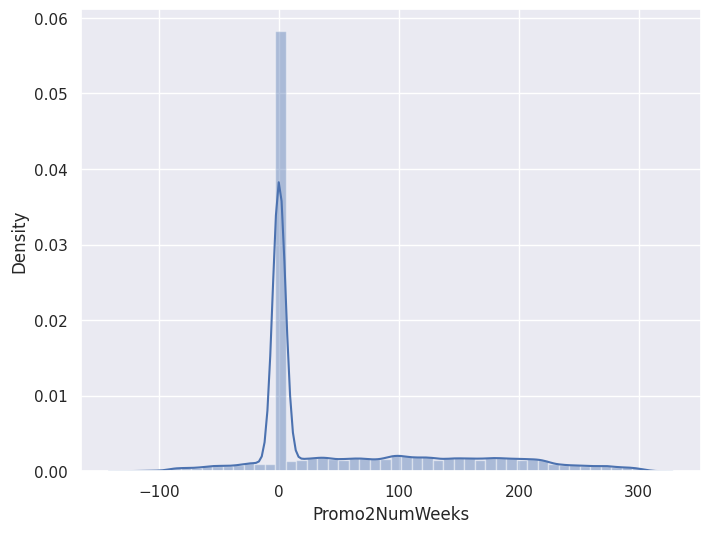

In [204]:
# check the distribution of Promo2NumWeeks
density_plot_of_a_feature(total_df, 'Promo2NumWeeks')

Negative values for Promo2NumWeeks are not acceptable. Lets check why negative values occured.

In [205]:
# dataset for negative Promo2NumWeeks values
total_df[total_df['Promo2NumWeeks'] < 0].loc[:, ['WeekOfYear', 'Year', 'Promo2SinceWeek', 'Promo2SinceYear', 'Promo2NumWeeks']]

WeekOfYear  Year  Promo2SinceWeek  Promo2SinceYear  Promo2NumWeeks
68442            22  2015               23             2015              -1
68643            22  2015               23             2015              -1
68886            22  2015               23             2015              -1
69557            22  2015               23             2015              -1
69758            22  2015               23             2015              -1
...             ...   ...              ...              ...             ...
1017195           1  2013               40             2014             -91
1017196           1  2013                5             2013              -4
1017198           1  2013                5             2013              -4
1017199           1  2013               31             2013             -30
1017204           1  2013               31             2013             -30

[69970 rows x 5 columns]

Some values are negative because in some observations, the promo 2 has not started when the sales was recorded. Lets change all negative values to 0.

In [206]:
# change negative values of Promo2NumWeeks to 0
total_df['Promo2NumWeeks'] = total_df['Promo2NumWeeks'].apply(lambda x: 0 if x < 0 else x)

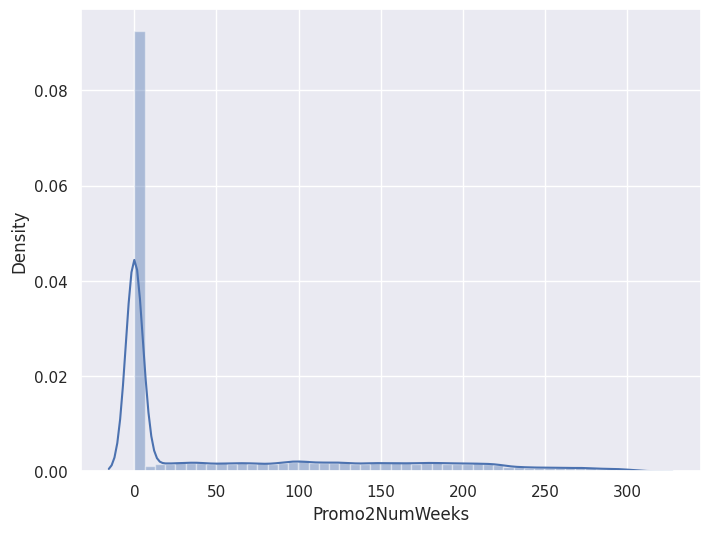

In [207]:
# check the distribution of Promo2NumWeeks
density_plot_of_a_feature(total_df, 'Promo2NumWeeks')

In [208]:
# exploring the head of the resultant dataframe
total_df.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1           0.0   
1      2          5 2015-07-31   6064        625     1      1           0.0   
2      3          5 2015-07-31   8314        821     1      1           0.0   
3      4          5 2015-07-31  13995       1498     1      1           0.0   
4      5          5 2015-07-31   4822        559     1      1           0.0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                          9                      2008       0   
1                         11                      2007       1   
2                         12                      2006       1   
3                          9                      2009       0   
4                          4                      2015       0   

   Promo2SinceWeek  Promo2SinceYear    PromoInterval  Year  Month  WeekOfYear  \
0                0                0                0  2015      7          31   
1               13             2010  Jan,Apr,Jul,Oct  2015      7          31   
2               14             2011  Jan,Apr,Jul,Oct  2015      7          31   
3                0                0                0  2015      7          31   
4                0                0                0  2015      7          31   

   CompetitionOpenNumMonths  Promo2NumWeeks  
0                        82               0  
1                        92             278  
2                       103             225  
3                        70               0  
4                         3               0

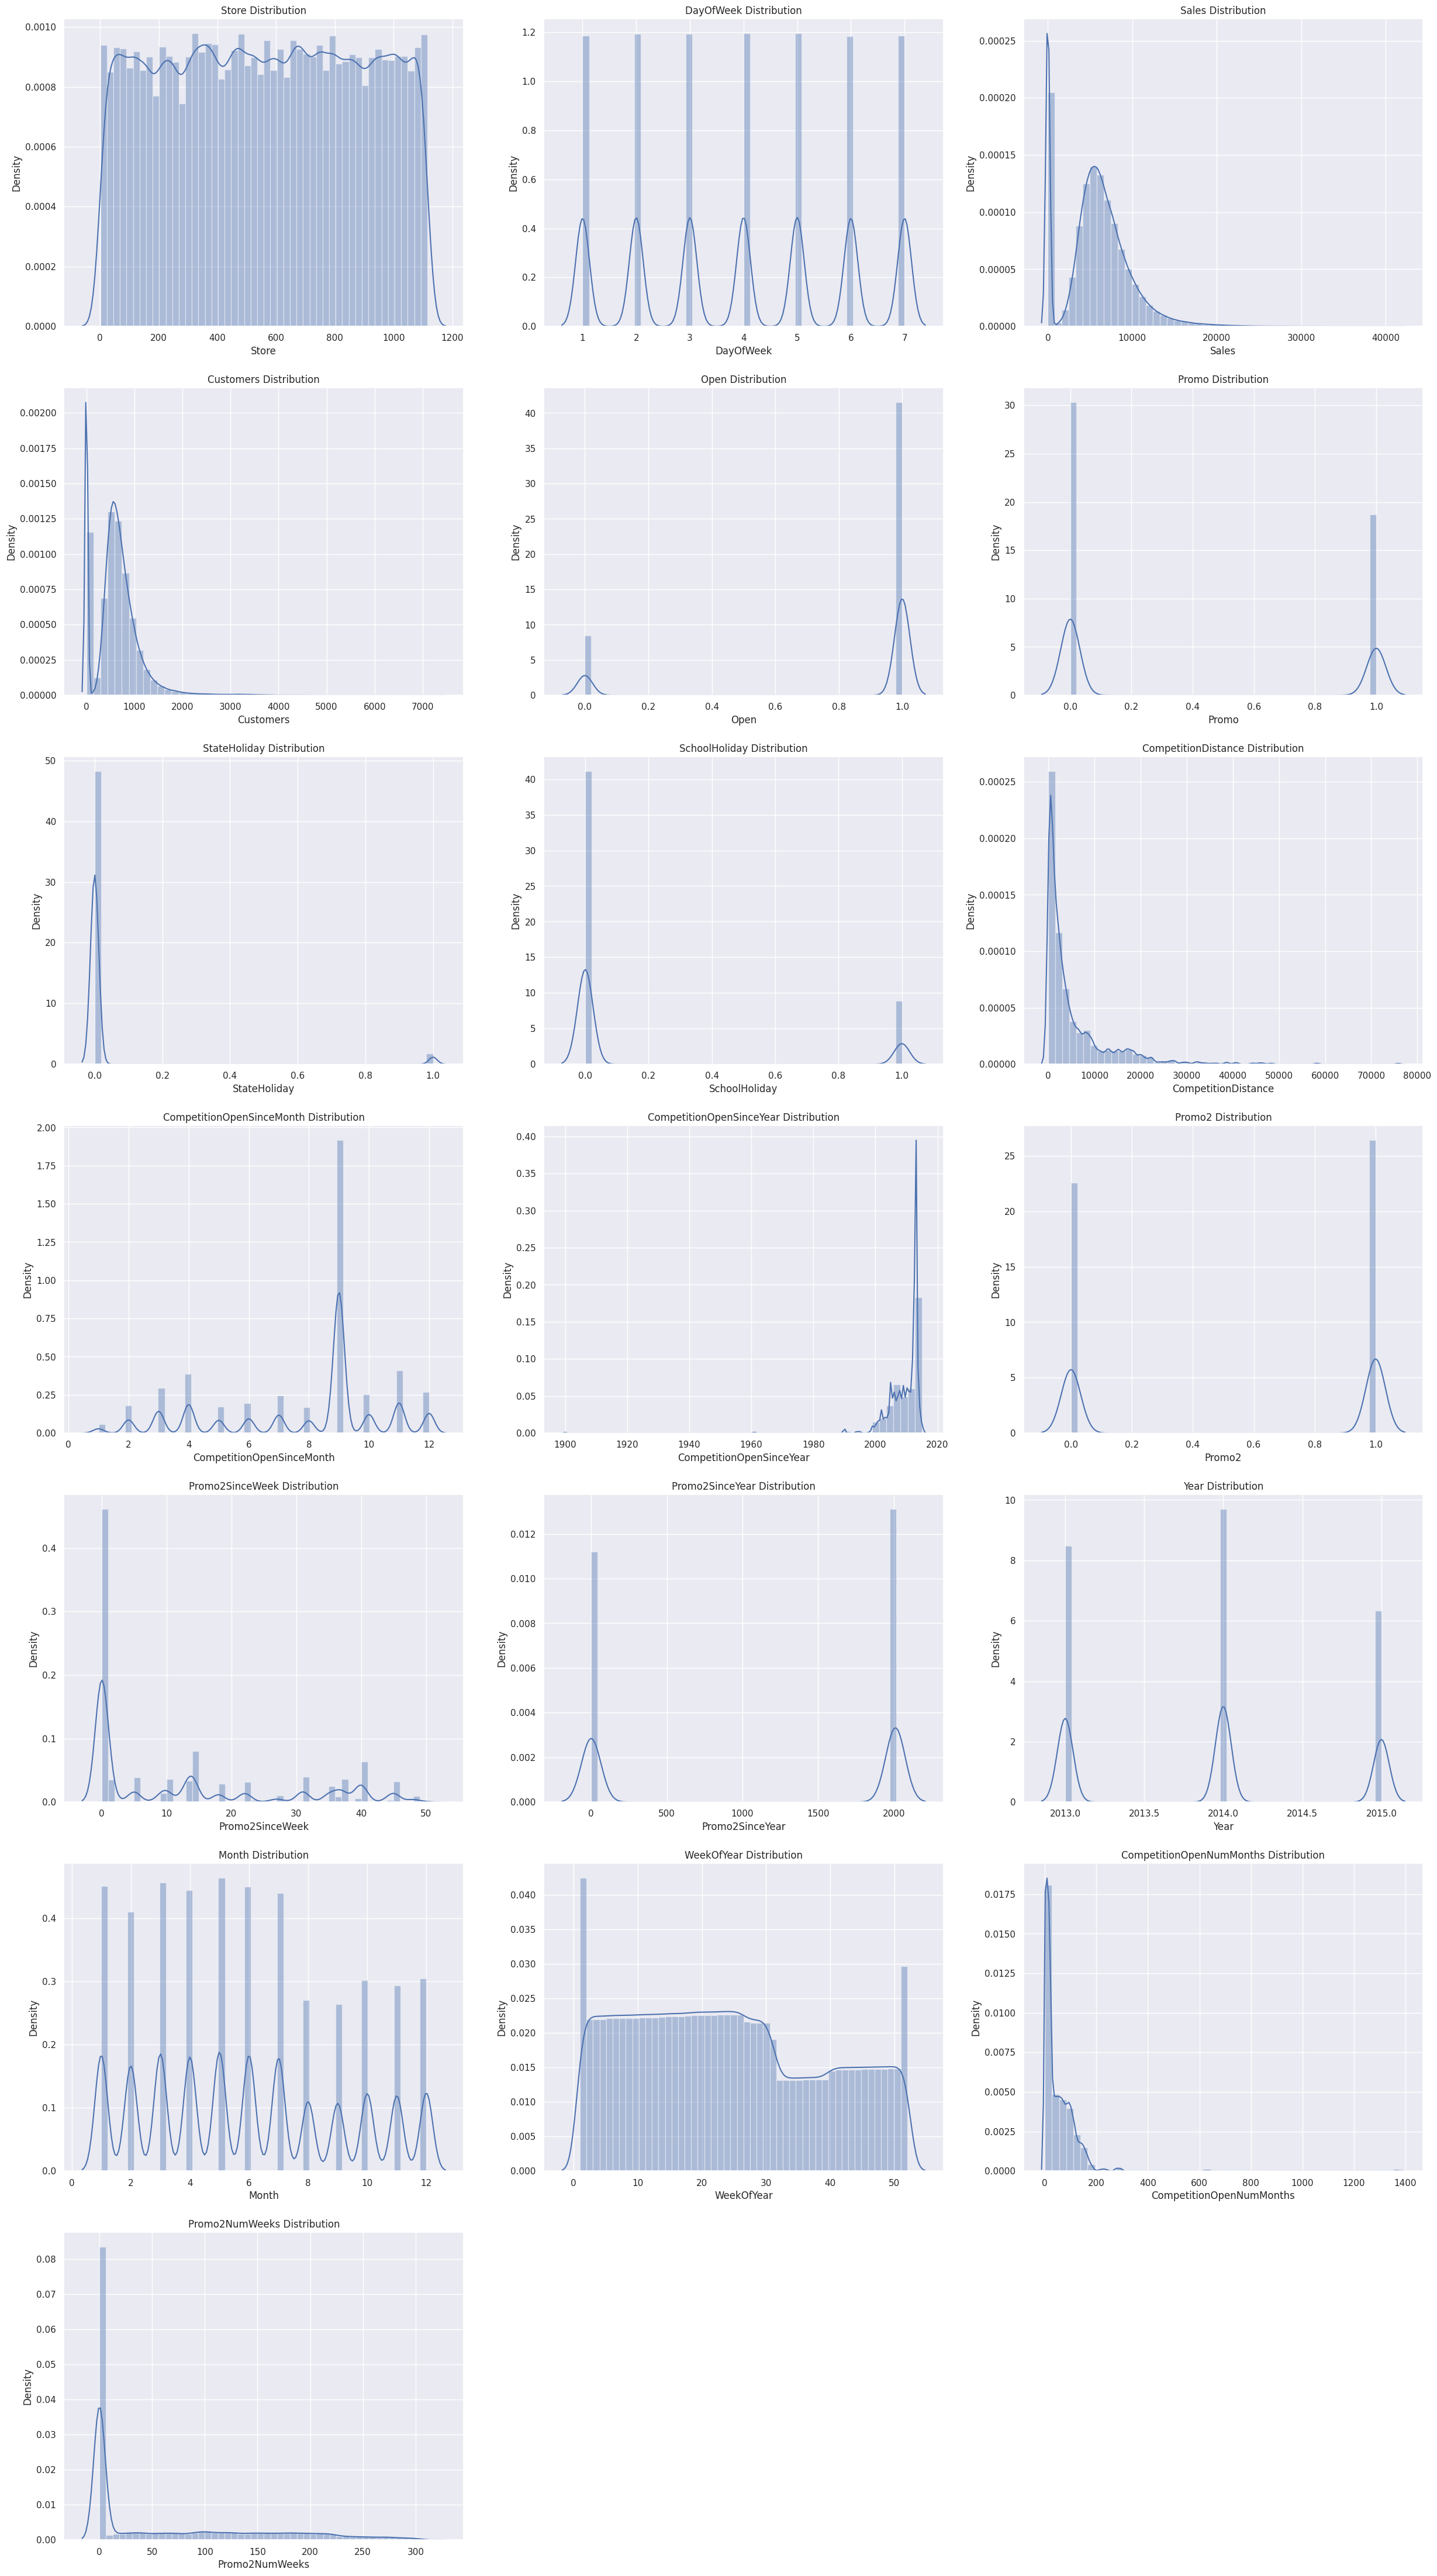

In [209]:
density_plot_of_all_features(total_df[(total_df['CompetitionOpenNumMonths'] != 0) | (total_df['Promo2NumWeeks'] != 0)])

Distribution of sales, customer, competition distance, competition open number of months and promo 2 number of weeks are positively skewed. Everything else are categorial features.

### What all manipulations have you done and insights you found?

The manipulation performed involved:


Filling in any missing values in the dataframe with zeros. This ensures that the data is in a suitable format for further analysis.

The insights found from this manipulation are:

1. Converted the 'Date' column to the format 'YYYY-MM-DD'.
2. Mapped the 'PromoInterval' column to numerical values based on defined intervals. Also mapped 'StateHoliday', 'StoreType', 'Assortment' columns to integer format which were of Object Data Type.
3. Filled missing values in the dataframe with zeros.

These changes facilitate a more suitable for analysis and modeling process, as numerical data is often required for various statistical and machine learning techniques.

The dataframe has been updated with these manipulations, ensuring that the data is in a suitable format for further analysis, exploration and modeling.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

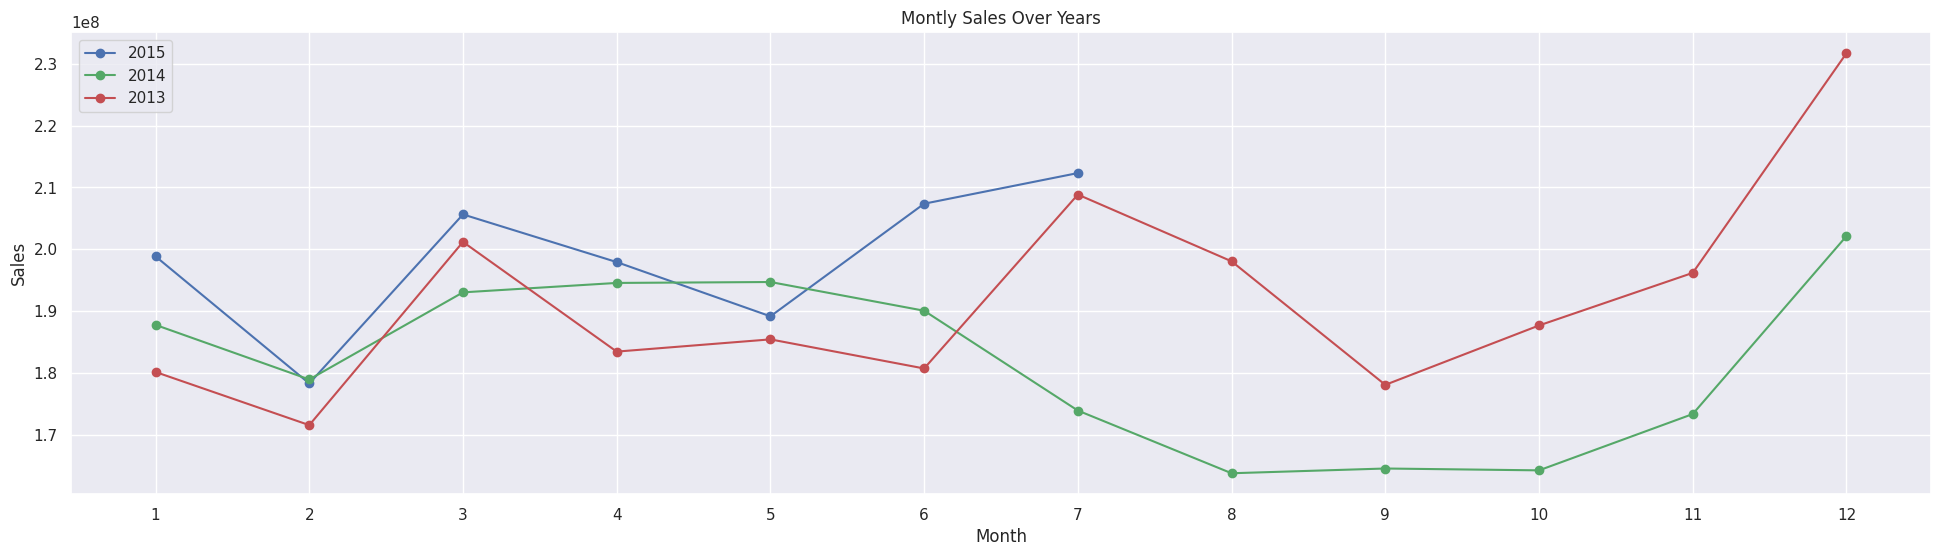

In [210]:
# line graph for montly sales over years
# Calling already defined function for better code modularity
plot_line_graph_with_two_feature_over_time(total_df, 'Month', 'Sales', 'Year', 'Montly')

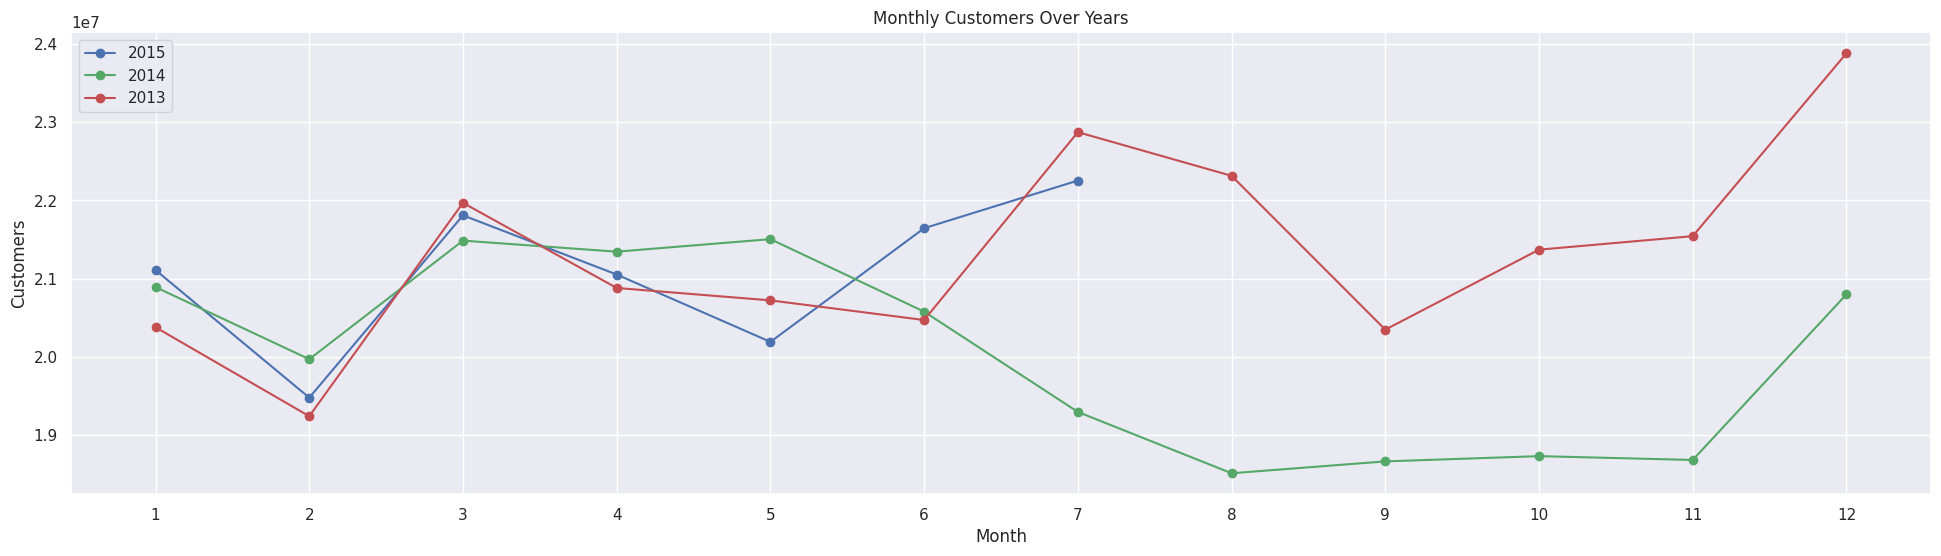

In [211]:
# line graph of monthly customers over years
plot_line_graph_with_two_feature_over_time(total_df, 'Month', 'Customers', 'Year', 'Monthly')

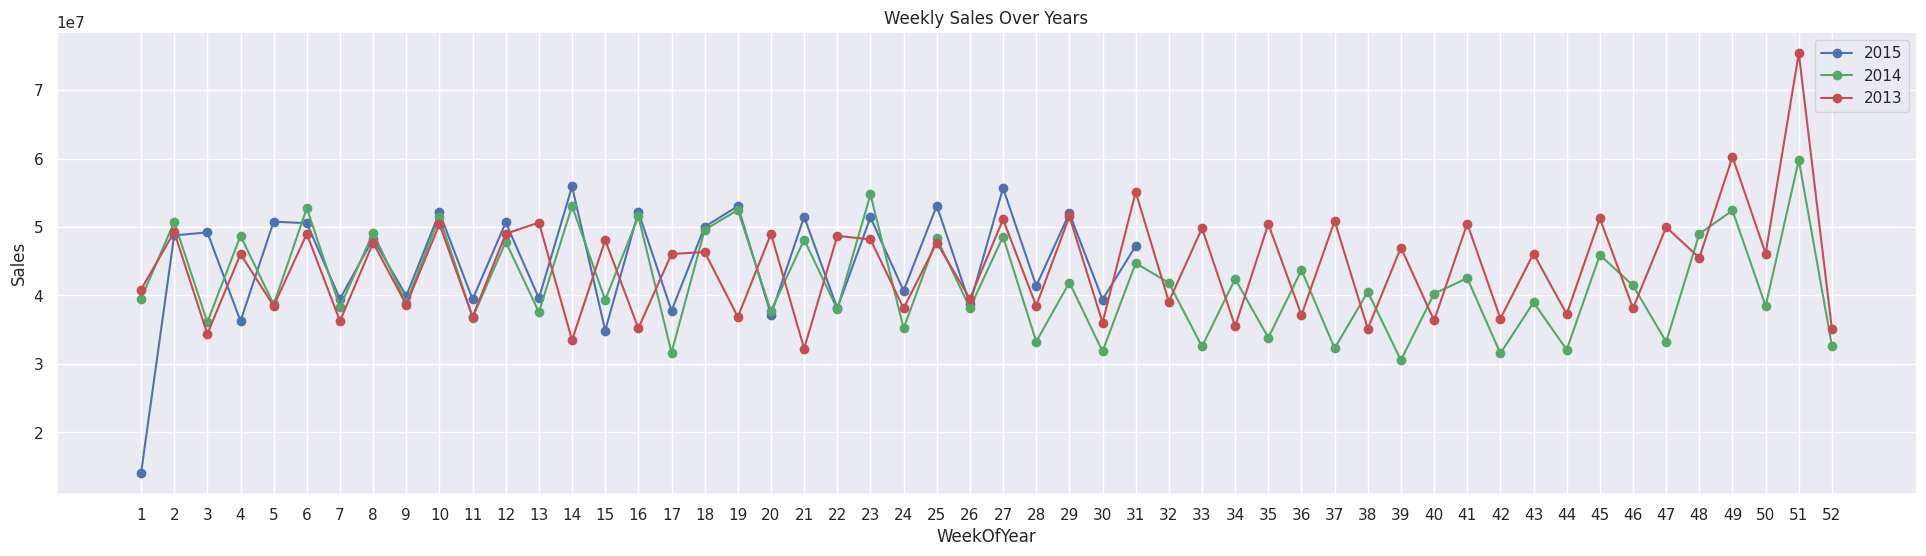

In [212]:
# line graph of weekly sales over years
plot_line_graph_with_two_feature_over_time(total_df, 'WeekOfYear', 'Sales', 'Year', 'Weekly')

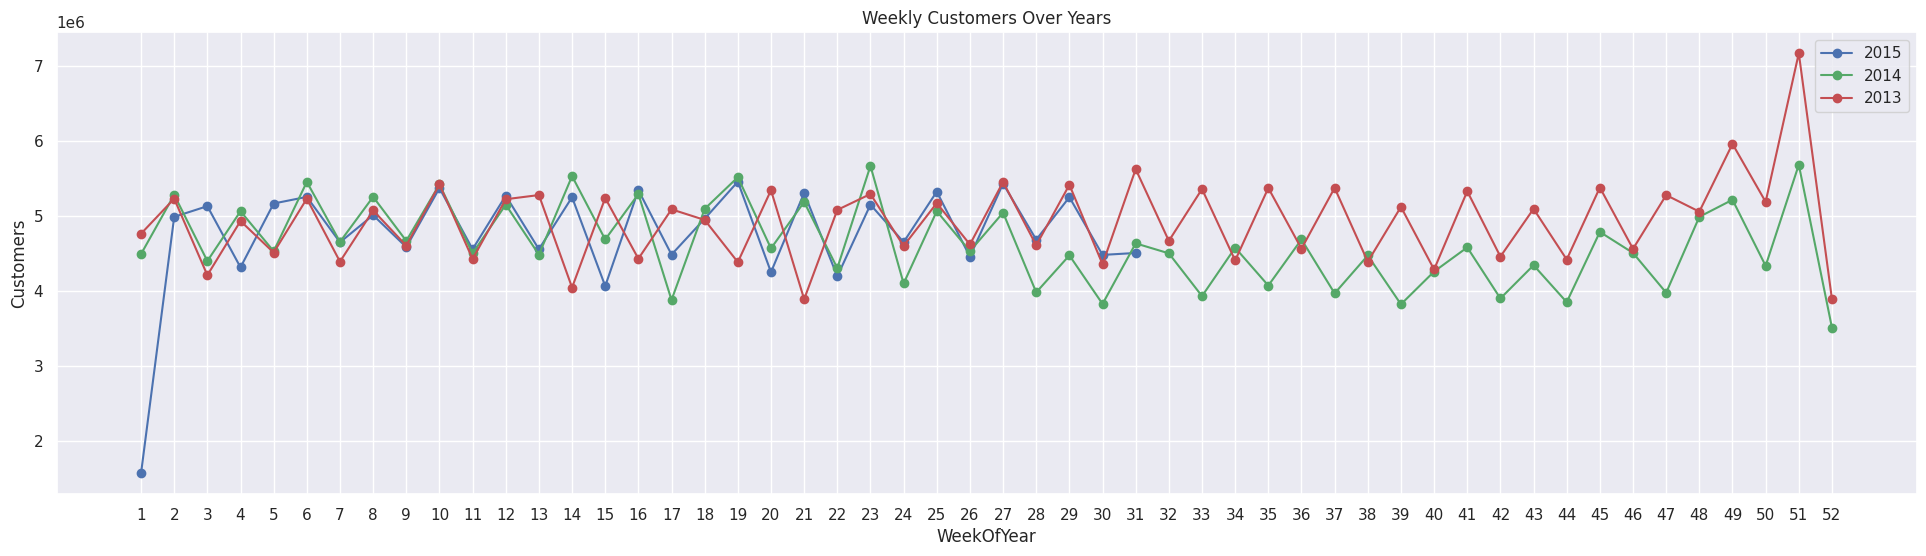

In [213]:
# line graph of weekly customers over years
plot_line_graph_with_two_feature_over_time(total_df, 'WeekOfYear', 'Customers', 'Year', 'Weekly')

#### Chart - 2

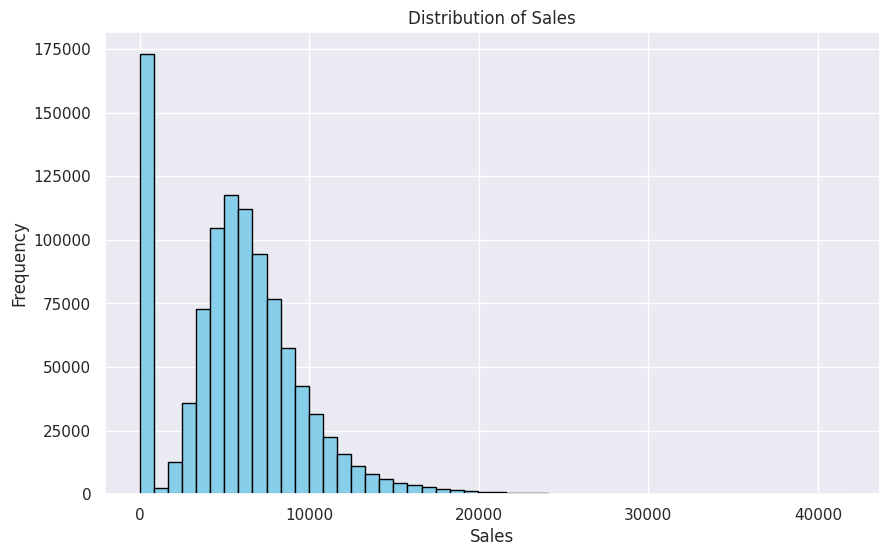

In [214]:
# Chart - 1 visualization code
# Visualize the distribution of sales
plt.figure(figsize=(10, 6))
plt.hist(total_df['Sales'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

The histogram was chosen to visualize the distribution of sales because it provides a clear representation of the frequency of different sales amounts. This allows us to understand the spread of sales values and identify any patterns or outliers in the data. The visualization helps in gaining insights into the sales performance of the stores and can aid in making informed business decisions.


##### 2. What is/are the insight(s) found from the chart?

The histogram above displays the distribution of sales across the merged dataset. It shows how frequently certain sales amounts occur, giving us an insight into the sales performance of the stores.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the visualization of the sales distribution will indeed help in creating a positive business impact. By understanding the frequency and spread of sales amounts, businesses can identify trends, outliers, and potential areas for improvement. This information can be used to optimize pricing strategies, forecast future sales, and make informed decisions to enhance overall sales performance.



#### Chart - 3

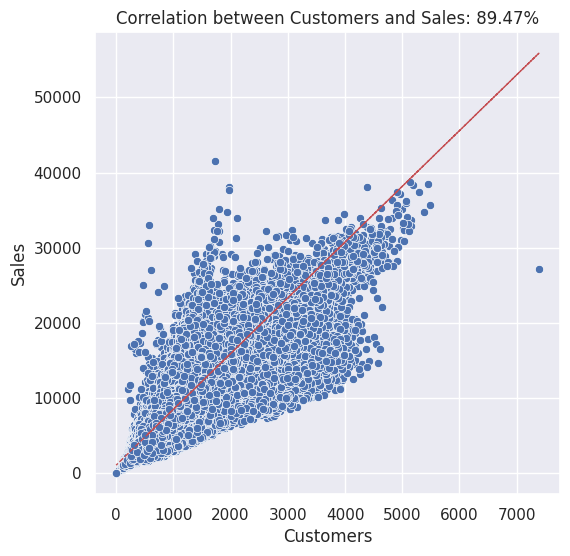

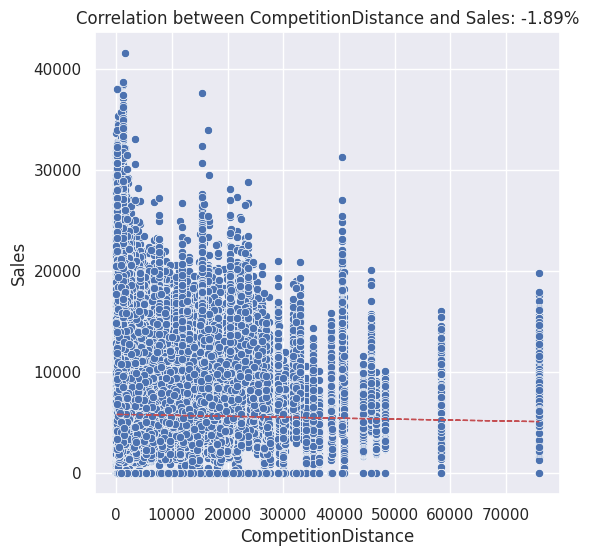

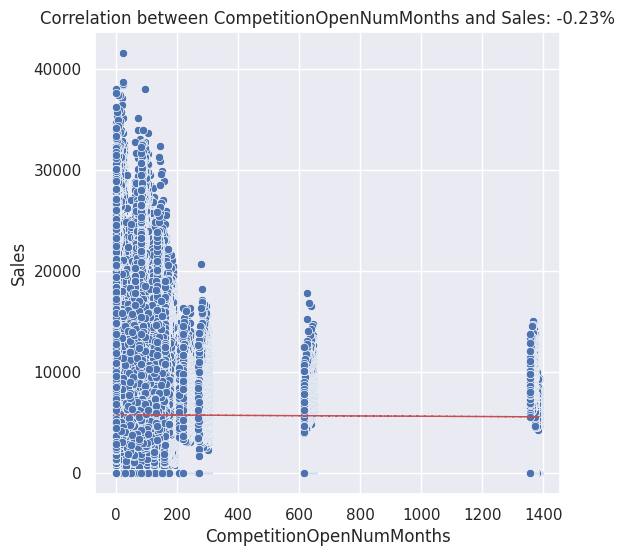

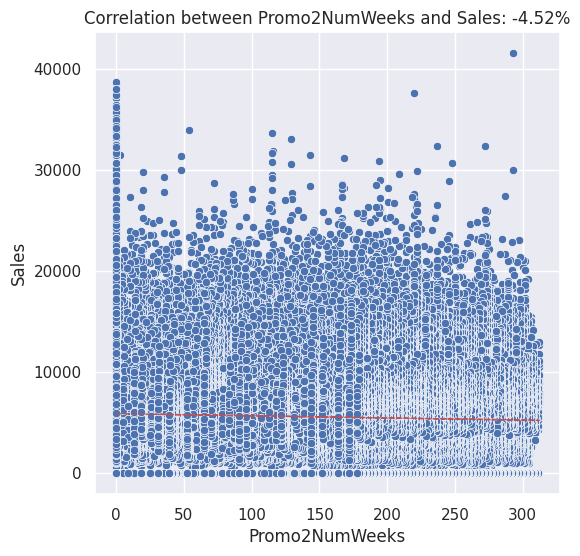

In [215]:
# generate scatter plot to show the variation in sales with the numerical features
numerical_features = ['Customers', 'CompetitionDistance', 'CompetitionOpenNumMonths', 'Promo2NumWeeks']
for i in numerical_features:
  scatter_plot_with_regression_line(total_df, i, 'Sales')

* Relationship between sales and customers is almost linear. So we can safely say that as the number of customers increases, sales also increase.
* Sales decreases with increase in competition distance, competition open number of months and promo 2 number of weeks but they have very low correlation with competition distance.

##### 1. Why did you pick the specific chart?

The scatterplot was chosen to visualize the relationship between the number of 'Customers', 'CompetitionDistance', 'CompetitionOpenNumMonths', 'Promo2NumWeeks' with columns "Sales" because it allows for the examination of how these two variables are related. By plotting the data points for each store, we can observe any patterns or correlations between customer footfall and sales figures. This visualization helps in understanding the impact of customer traffic on sales performance.

##### 2. What is/are the insight(s) found from the chart?

The scatterplot visualizes the relationship between the number of 'Customers', 'CompetitionDistance', 'CompetitionOpenNumMonths', 'Promo2NumWeeks' with "Sales". It provides insight into how customer footfall impacts sales figures, allowing us to identify any patterns or correlations between these two variables. This visualization helps in understanding the impact of customer traffic on sales performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the scatterplot visualization of the relationship between the 'Customers', 'CompetitionDistance', 'CompetitionOpenNumMonths', 'Promo2NumWeeks' and sales will indeed help in creating a positive business impact. By understanding how customer footfall impacts sales figures, businesses can optimize staffing, inventory, and marketing strategies to align with customer traffic patterns. This can lead to improved sales performance and enhanced customer satisfaction, ultimately contributing to a positive business impact.


#### Chart - 4

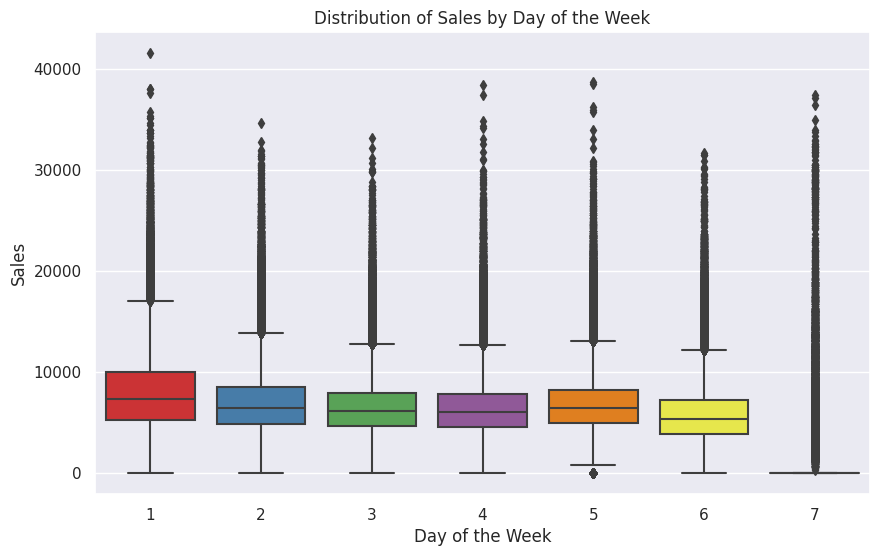

In [216]:
# Chart - 3 visualization code
# Visualize the distribution of sales by day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(data=total_df, x='DayOfWeek', y='Sales', palette='Set1')
plt.title('Distribution of Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sales')
plt.show()

##### 1. Why did you pick the specific chart?

The boxplot was chosen to visualize the distribution of sales by day of the week because it allows for a clear comparison of sales performance across different days. The boxplot provides insights into the median, quartiles, and potential outliers in sales figures for each day of the week, helping to identify any patterns or variations in sales performance based on the day.

##### 2. What is/are the insight(s) found from the chart?

The boxplot of sales by day of the week provides insights into the distribution of sales figures across different days. It helps in identifying any patterns or variations in sales performance based on the day of the week. This visualization can reveal which days tend to have higher or lower sales, allowing businesses to tailor their strategies and operations accordingly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the visualization of sales by day of the week will help in creating a positive business impact by identifying patterns and variations in sales performance based on different days. This information can be used to optimize staffing, promotions, and inventory management to align with the sales trends observed on specific days. Ultimately, this can lead to improved operational efficiency and enhanced sales performance, contributing to a positive business impact.

#### Chart - 5

Lets check how some categorical features like DayOfWeek, Promo, SchoolHoliday, etc. affect the sales and customers.

In [217]:
# # categotical variables under consideration
# categorical_variables = ['DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
#                          'StoreType', 'Assortment', 'Promo2', 'PromoInterval']

# # plot bar graphs for each categorical variable against the sum of sales
# for feature in categorical_variables:
#   plot_bar_graph_with_two_features(total_df, feature, ['Sales', 'Customers'])

##### 1. Why did you pick the specific chart?

The bar plot was chosen to visualize the average sales across different store types because it provides a clear comparison of the sales performance for each store type. The length of the bars represents the average sales, making it easy to compare the values across the different categories. This type of visualization is effective for comparing numerical values across categories and identifying any significant differences in sales performance between store types.

##### 2. What is/are the insight(s) found from the chart?

The following observations were made from the above graphs:

* Highest sales are recorded on Mondays and lowest sales are recorded on Sundays. This may be because most of the shops are closed on Sundays and this leads to higher demand on the next day, which is Monday.
* Presence of promos increases sales.
* Shops are closed on all state holidays but sometimes some shops are opened during school holidays, which may be Saturdays.
* Sales are higher on school holidays than other days.
* Store type a records the most amount of sales mostly because the majority of the shops are type a.
* Sales of assortment b is very rare.
* Participants of promo 2 has less sales might be because it is seasonal and doesn't have any effect on sales.
* Promo interval Jan, Apr, Jul, Oct brings in more sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the visualization of average sales by store type can help in creating a positive business impact by identifying the store types with higher or lower average sales. This information can be used to make strategic decisions such as allocating resources, adjusting marketing strategies, and optimizing product offerings to improve sales performance.
If there are store types with consistently lower average sales, this could lead to negative growth if not addressed. It may indicate that certain store types are underperforming and require attention in terms of marketing, product assortment, or operational improvements to drive sales and improve overall performance. Identifying these areas for improvement can help mitigate negative growth and drive positive business impact.

#### Chart - 6

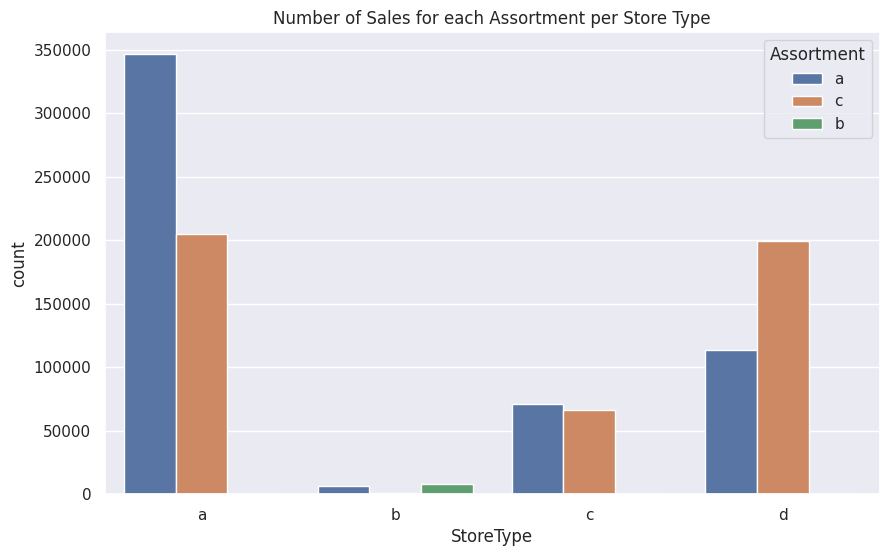

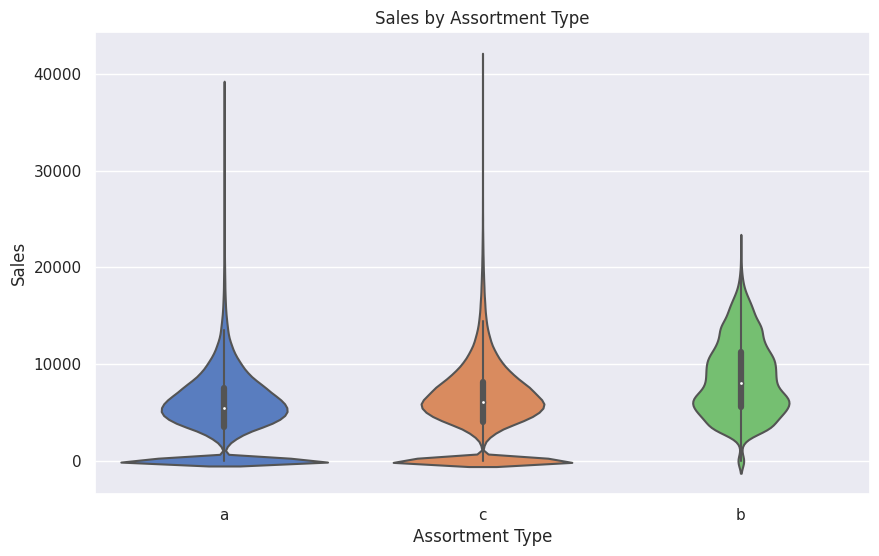

In [218]:
# Visualize the sales data by assortment
# Lets check the number of sales for each assortment in different store types.
plt.figure(figsize=(10, 6))
sns.countplot(x='StoreType', hue='Assortment', order=sorted(total_df['StoreType'].unique().tolist()), data=total_df, palette=sns.color_palette(n_colors=3))
plt.title("Number of Sales for each Assortment per Store Type")

# Visualize the sales data by assortment type using a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Assortment', y='Sales', data=total_df, palette='muted')
plt.title('Sales by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Sales')
plt.show()

* Only store type b sells assortment b and it has higher sales than assortment a.

##### 1. Why did you pick the specific chart?

The violin plot was chosen to visualize the sales data by assortment type because it provides a clear representation of the distribution and probability density of sales for each category. This type of plot is effective in showing the range of sales values and their distribution, making it easy to compare the assortment types and identify any significant differences in sales performance.

##### 2. What is/are the insight(s) found from the chart?

The violin plot provides a clear visualization of the distribution and probability density of sales for each assortment type. It allows us to compare the range of sales values and their distribution across different assortment types, providing insights into the sales performance of each category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the visualization of sales by assortment type will help in creating a positive business impact by providing a clear understanding of the distribution and probability density of sales for each assortment category. This information can be used to make informed decisions about product assortment, marketing strategies, and inventory management to optimize sales performance and drive positive business impact.
Identifying any assortment types with consistently lower sales or narrower distribution may indicate areas for improvement. For example, if a certain assortment type consistently shows lower sales and a narrower distribution, it may lead to negative growth if not addressed. This could indicate that the product assortment within that category is not resonating with customers, and adjustments may be needed to drive sales and improve overall performance.

#### Chart - 7

<Figure size 1000x600 with 0 Axes>

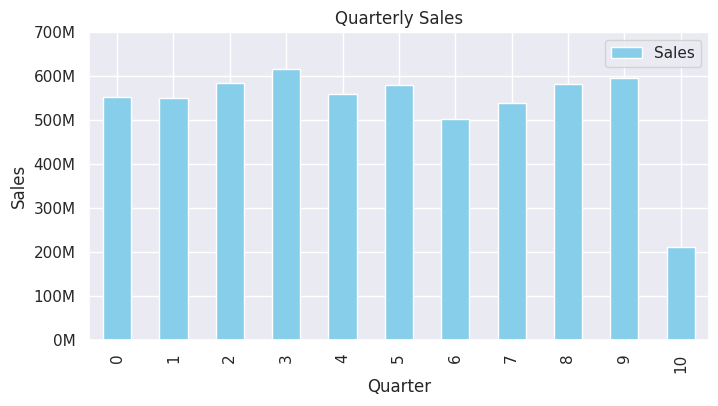

In [219]:
# Chart - 6 visualization code
# Create a new column 'Quarter' to represent the quarter of each date
total_df['Quarter'] = total_df['Date'].dt.to_period('Q')

# Group by quarter and sum the sales
quarterly_sales = total_df.groupby('Quarter')['Sales'].sum().reset_index()
# Plot the quarterly sales
plt.figure(figsize=(10, 6))
quarterly_sales.plot(kind='bar', color='skyblue')
plt.title('Quarterly Sales')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.yticks(plt.yticks()[0], [f'{int(y/1000000)}M' for y in plt.yticks()[0]])

plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Here are some reasons for choosing a bar chart for quarterly sales:
Categorical Data (Quarters): The x-axis represents categorical data (quarters), making a bar chart a suitable choice for displaying discrete categories.

Aggregated Data: Since you are aggregating sales data for each quarter, a bar chart is a straightforward way to display the total sales for each period.

It's important to choose a chart type that best communicates the insights you want to convey. In this scenario, a bar chart is commonly used for visualizing sales data over discrete time intervals (quarters) and comparing values between those intervals.

##### 2. What is/are the insight(s) found from the chart?

insights that one might typically derive from a bar chart representing quarterly sales:

Seasonal Patterns: Check for any noticeable seasonal patterns or trends in sales across the quarters. Are there specific quarters where sales consistently peak or decline?

Sales Growth or Decline: Assess whether there is a clear trend of sales growth or decline over the quarters.

Comparing Quarters: Compare the sales figures for each quarter to understand how they contribute to the overall performance. Identify the quarters with the highest and lowest sales.

Promotion Impact: If applicable, assess whether quarters with promotional activities show a noticeable impact on sales compared to non-promotional quarters.

These insights can help in making informed business decisions, planning marketing strategies, and understanding the overall performance of the business over time.








##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The business impact depends on the actions taken in response to the insights gained. Positive impacts arise when insights inform effective strategies, while negative impacts can be mitigated by adjusting strategies based on the identified challenges or weaknesses. Regular monitoring and adaptation to changing market conditions are essential for sustaining positive business outcomes.
**Positive Business Impact:**

Identifying Strong Quarters

Understanding Seasonal Trends

Promotion Effectiveness (if any in that quarter)

**Negative Business Impact:**

Identifying Weak Quarters

Unsuccessful Promotions

Cyclical Declines

#### Chart - 8

<Axes: >

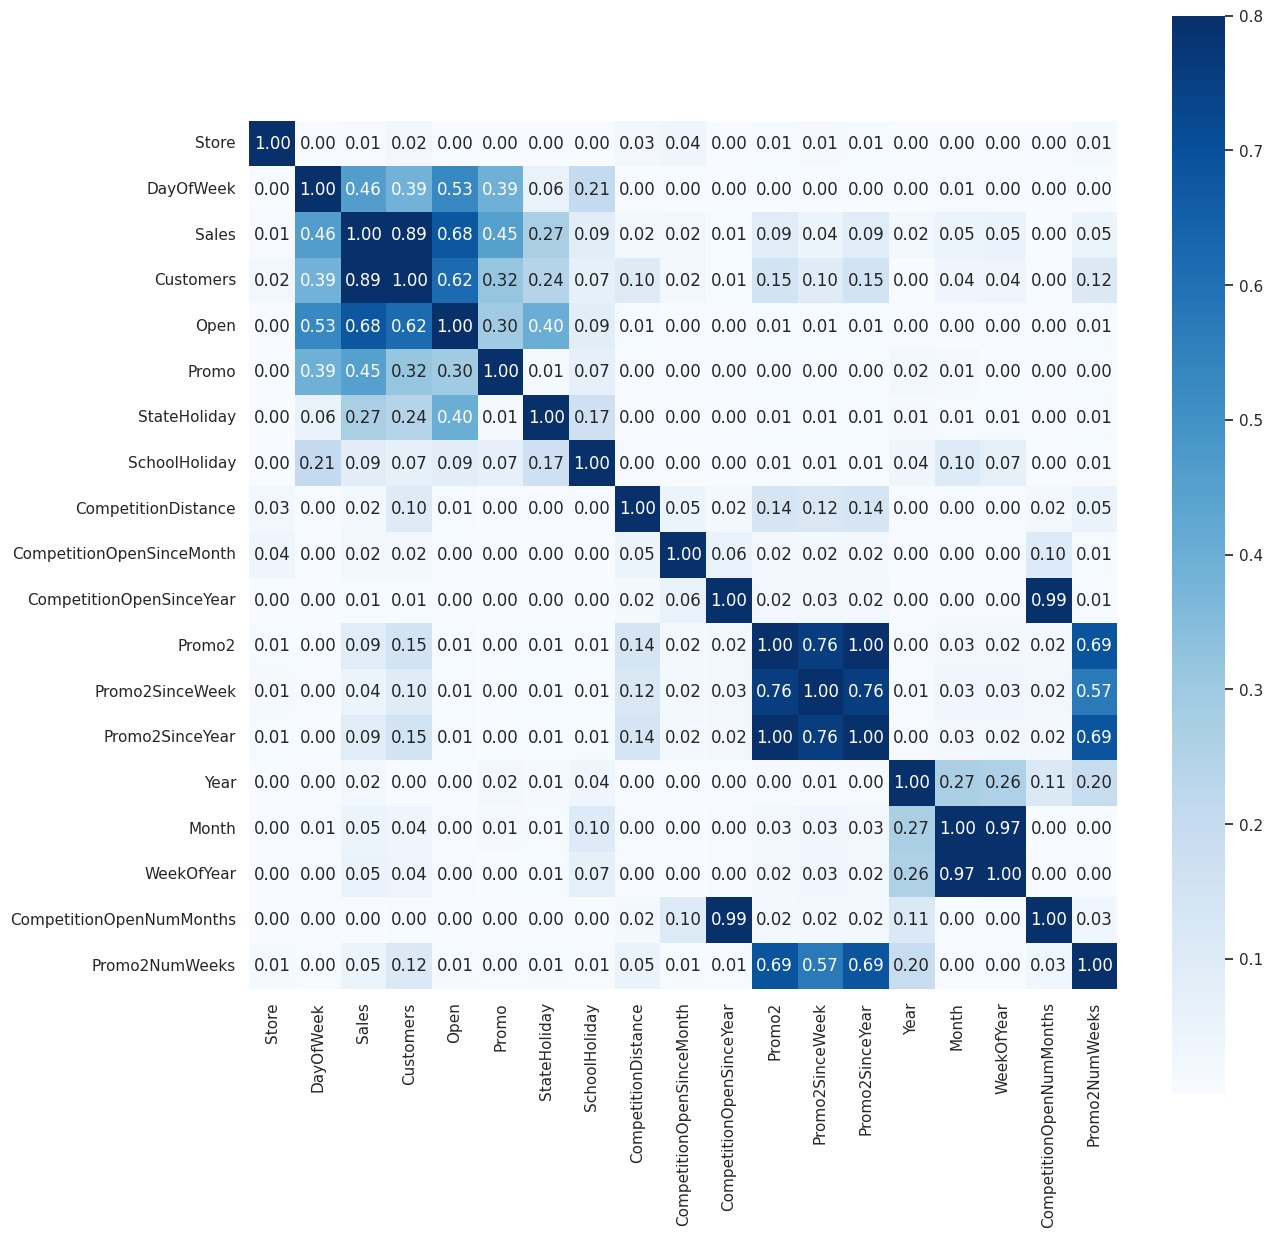

In [220]:
# Correlation Heatmap Visualization
corr_mat = total_df.corr().abs()
plt.figure(figsize = (14,14))
sns.heatmap(corr_mat, vmax=.8, square=True, fmt='.2f', cmap='Blues', annot = True)

# sns.heatmap(corr_mat, annot = True, ', annot_kws={'size': 10},  vmax=.8, square=True, cmap='Blues');

##### 1. Why did you pick the specific chart?

The correlation matrix was chosen to provide insights into the relationships between different variables in the dataset. It allows us to understand the strength and direction of the linear relationships between the variables. This information is valuable for identifying potential predictors of sales and understanding how different factors are related to each other within the dataset.

##### 2. What is/are the insight(s) found from the chart?

The correlation matrix provides insights into the relationships between different variables in the dataset. For instance, there is a strong positive correlation between Sales and Customers, indicating that stores with more customers tend to have higher sales. Other variables show varying degrees of correlation with Sales, which could be useful for further analysis or predictive modeling.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the correlation matrix, particularly the strong positive correlation between Sales and Customers, can indeed help create a positive business impact. This insight suggests that increasing the number of customers visiting the stores could lead to higher sales, which could inform strategies to attract and retain customers.
As for insights that could lead to negative growth, the correlation matrix does not indicate any specific negative impacts. However, it's important to note that correlation does not imply causation, and further analysis and experimentation would be needed to validate the relationships observed in the data. Additionally, the presence of outliers in the data could potentially impact the accuracy of the correlations, so it's important to address outliers and ensure the robustness of the insights.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: The mean sales are the same for all dates

Alternative hypothesis: The mean sales are different for at least one date

#### 2. Perform an appropriate statistical test.

In [221]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Ensure the 'Date' column is in the appropriate datetime format
total_df['Date'] = pd.to_datetime(total_df['Date'])

# Perform a hypothesis test on the sales data
# One-way ANOVA test
f_statistic, p_value = stats.f_oneway(*[group['Sales'] for name, group in total_df.groupby('Date')])

f_statistic, p_value

(1381.6549752489486, 0.0)

The hypothesis testing on the sales data from total_df has been performed using a one-way ANOVA test. Here are the results:

F-statistic: 1381.65

P-value: 0.0

Given the p-value is 0.0, we can reject the null hypothesis that the mean sales are the same for all dates. This indicates that there is a statistically significant difference in mean sales for at least one date.

##### Which statistical test have you done to obtain P-Value?

I performed a one-way ANOVA test to obtain the p-value. The one-way ANOVA test is used to determine whether there are any statistically significant differences between the means of three or more independent (unrelated) groups. In this case, I used the test to compare the mean sales for different dates to see if there are any significant differences. The obtained p-value from the test was 0.0, indicating a statistically significant difference in mean sales for at least one date.

##### Why did you choose the specific statistical test?

I chose the one-way ANOVA test to compare the mean sales for different dates because it is specifically designed to determine whether there are any statistically significant differences between the means of three or more independent (unrelated) groups. In this case, I wanted to compare the mean sales for different dates to see if there are any significant differences. The one-way ANOVA test allows for this comparison and provides a p-value that indicates whether there is a statistically significant difference in mean sales for at least one date

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [222]:
# taking a copy of the dataset as backup
total_backup = total_df.copy()
# exploring the head of the resultant dataframe
total_df.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1           0.0   
1      2          5 2015-07-31   6064        625     1      1           0.0   
2      3          5 2015-07-31   8314        821     1      1           0.0   
3      4          5 2015-07-31  13995       1498     1      1           0.0   
4      5          5 2015-07-31   4822        559     1      1           0.0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                          9                      2008       0   
1                         11                      2007       1   
2                         12                      2006       1   
3                          9                      2009       0   
4                          4                      2015       0   

   Promo2SinceWeek  Promo2SinceYear    PromoInterval  Year  Month  WeekOfYear  \
0                0                0                0  2015      7          31   
1               13             2010  Jan,Apr,Jul,Oct  2015      7          31   
2               14             2011  Jan,Apr,Jul,Oct  2015      7          31   
3                0                0                0  2015      7          31   
4                0                0                0  2015      7          31   

   CompetitionOpenNumMonths  Promo2NumWeeks Quarter  
0                        82               0  2015Q3  
1                        92             278  2015Q3  
2                       103             225  2015Q3  
3                        70               0  2015Q3  
4                         3               0  2015Q3

In [223]:
duplkicates_total = total_df.duplicated().sum()
duplkicates_total

0

In [224]:
total_df.shape

(1017209, 24)

## Feature Selection

Lets remove store since we need sales of all stores, not a particular one and also sales can be predicted through store type, assortment, etc.

In [225]:
# drop Store
total_df.drop('Store', axis=1, inplace=True)

Lets remove date since there are already day of week and week of year features in the dataset.

In [226]:
# drop Date
columns_to_drop = ['Date','Quarter']
total_df.drop(columns = columns_to_drop, axis=1, inplace=True)

Lets remove competition open since month and competition open since year as the information provided by them can be obtained from competition open number of months.

In [227]:
# drop CompetitionOpenSinceMonth & CompetitionOpenSinceYear
total_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'], axis=1, inplace=True)

Lets remove promo 2, promo 2 since week and promo 2 since year as the information provided by them can be obtained from promo 2 number of weeks.

In [228]:
# drop Promo2, Promo2SinceWeek & Promo2SinceYear
total_df.drop(['Promo2', 'Promo2SinceWeek', 'Promo2SinceYear'], axis=1, inplace=True)

Lets remove month since we get the same information from week of the year.

In [229]:
# drop Month
total_df.drop('Month', axis=1, inplace=True)

Lets remove year as we have already established in EDA that its not the year that influence the sales but the day of the week and the week of the year.

In [230]:
# drop Year
total_df.drop('Year', axis=1, inplace=True)

In [231]:
# exploring the head of the resultant dataframe
total_df.head()

DayOfWeek  Sales  Customers  Open  Promo  StateHoliday  SchoolHoliday  \
0          5   5263        555     1      1           0.0              1   
1          5   6064        625     1      1           0.0              1   
2          5   8314        821     1      1           0.0              1   
3          5  13995       1498     1      1           0.0              1   
4          5   4822        559     1      1           0.0              1   

  StoreType Assortment  CompetitionDistance    PromoInterval  WeekOfYear  \
0         c          a               1270.0                0          31   
1         a          a                570.0  Jan,Apr,Jul,Oct          31   
2         a          a              14130.0  Jan,Apr,Jul,Oct          31   
3         c          c                620.0                0          31   
4         a          a              29910.0                0          31   

   CompetitionOpenNumMonths  Promo2NumWeeks  
0                        82               0  
1                        92             278  
2                       103             225  
3                        70               0  
4                         3               0

In [232]:
total_df[total_df["StateHoliday"].isna()].sum()

DayOfWeek                                                              520943
Sales                                                               751505326
Customers                                                            84171309
Open                                                                   112140
Promo                                                                   49623
StateHoliday                                                              0.0
SchoolHoliday                                                           30088
StoreType                   caabadaddddaadcdaaadcdaaaaaaddaaaabadaacdaaacd...
Assortment                  aacbacacaccaaccaaaaccccccaaaccccccbccacacaaacc...
CompetitionDistance                                               717385910.0
WeekOfYear                                                            2724905
CompetitionOpenNumMonths                                              5874814
Promo2NumWeeks                                                  

In [233]:
imputer = SimpleImputer(strategy='constant', fill_value=0) #Filling missing values with 0 (zero) preserves data structure
imputer.fit(total_df)
total_df.isnull().sum()

DayOfWeek                        0
Sales                            0
Customers                        0
Open                             0
Promo                            0
StateHoliday                131072
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance              0
PromoInterval                    0
WeekOfYear                       0
CompetitionOpenNumMonths         0
Promo2NumWeeks                   0
dtype: int64

In [234]:
# As NaN values persist, consider alternative strategies
total_df['StateHoliday'] = imputer.fit_transform(total_df[['StateHoliday']])
total_df['PromoInterval'] = imputer.fit_transform(total_df[['PromoInterval']])
total_df.isnull().sum()

DayOfWeek                   0
Sales                       0
Customers                   0
Open                        0
Promo                       0
StateHoliday                0
SchoolHoliday               0
StoreType                   0
Assortment                  0
CompetitionDistance         0
PromoInterval               0
WeekOfYear                  0
CompetitionOpenNumMonths    0
Promo2NumWeeks              0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Filling missing values with 0 (zero) preserves data structure, aids compatibility with numeric data, and is easily interpretable. However, it may distort statistical measures, impact model learning, and mislead data interpretation. The appropriateness depends on context and potential downstream effects on analyses and modeling. Careful consideration is crucial.

### 2. Handling Outliers

Handle Multicolinearity

Lets find out the VIF of all numerical features except 'Sales' in order to remove highly correlated features. Features having VIF greater than 5 should be eliminated.

In [235]:
# calculate VIF of all independant numerical features
numerical_independant_features = ['Customers', 'CompetitionDistance', 'CompetitionOpenNumMonths', 'Promo2NumWeeks']
calculate_vif_of_all_features(total_df[[column for column in total_df.describe().columns if column in numerical_independant_features]])

Feature       VIF
0                 Customers  1.500979
1       CompetitionDistance  1.256193
2  CompetitionOpenNumMonths  1.341305
3            Promo2NumWeeks  1.258342



**All features have VIF less than 5.**


# Handling Outliers

## Sales & Customers

Outlier detection for sales and customers can be done together since we have already established they have almost linear relationship. This way, detection and removal of outliers will be more convenient and accurate.

Store Type

Each store type records sales in different range. So it is more appropriate to detect outliers separately for each store type.

**Store Type**

Each store type records sales in different range. So it is more appropriate to detect outliers separately for each store type.

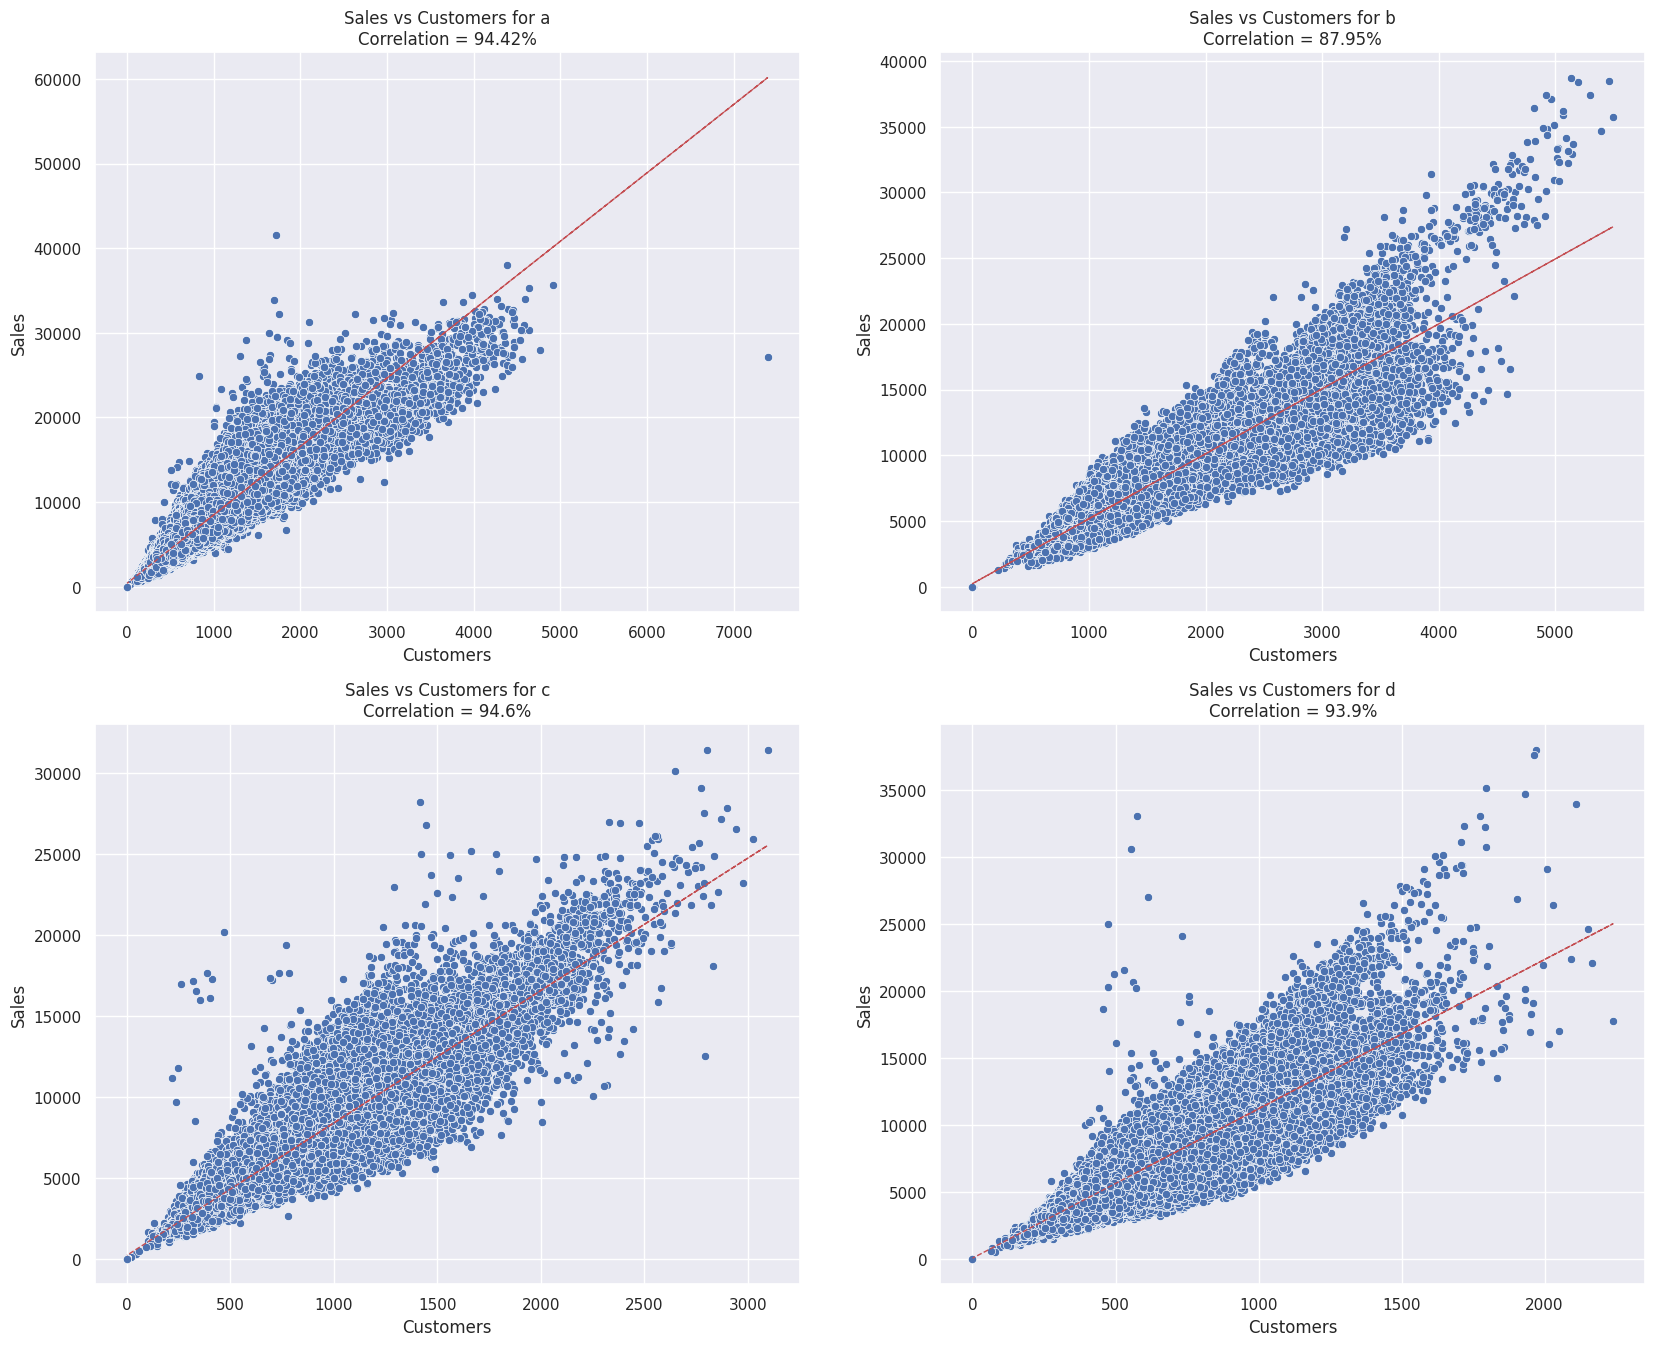

In [236]:
# generate scatter plots to check the linearity between sales and customers for each store type
scatter_plot_bw_sales_customers_with_feature_unique_values(total_df, 'StoreType')

Outliers have been identified from the scatter plot. Now lets remove them.

In [237]:
# remove outliers with respect to store types
a_filter = total_df[(total_df['StoreType'] == 'a') & (((total_df['Sales'] > 20000) & (total_df['Customers'] < 1000)) |
                                                            (total_df['Sales'] > 40000) | (total_df['Customers'] > 7000))].index
c_filter = total_df[(total_df['StoreType'] == 'c') & (((total_df['Sales'] > 9000) & (total_df['Customers'] < 500)) |
                                                            ((total_df['Sales'] < 15000) & (total_df['Customers'] > 2500)) |
                                                            ((total_df['Sales'] > 25000) & (total_df['Customers'] < 2000)) |
                                                             (total_df['Sales'] > 30000))].index
d_filter = total_df[(total_df['StoreType'] == 'd') & ((total_df['Sales'] > 17500) & (total_df['Customers'] < 875) |
                                                            (total_df['Sales'] > 31000) | (total_df['Customers'] > 2000))].index

total_df.drop(a_filter, inplace=True)
total_df.drop(c_filter, inplace=True)
total_df.drop(d_filter, inplace=True)

Now lets check if the outliers are removed

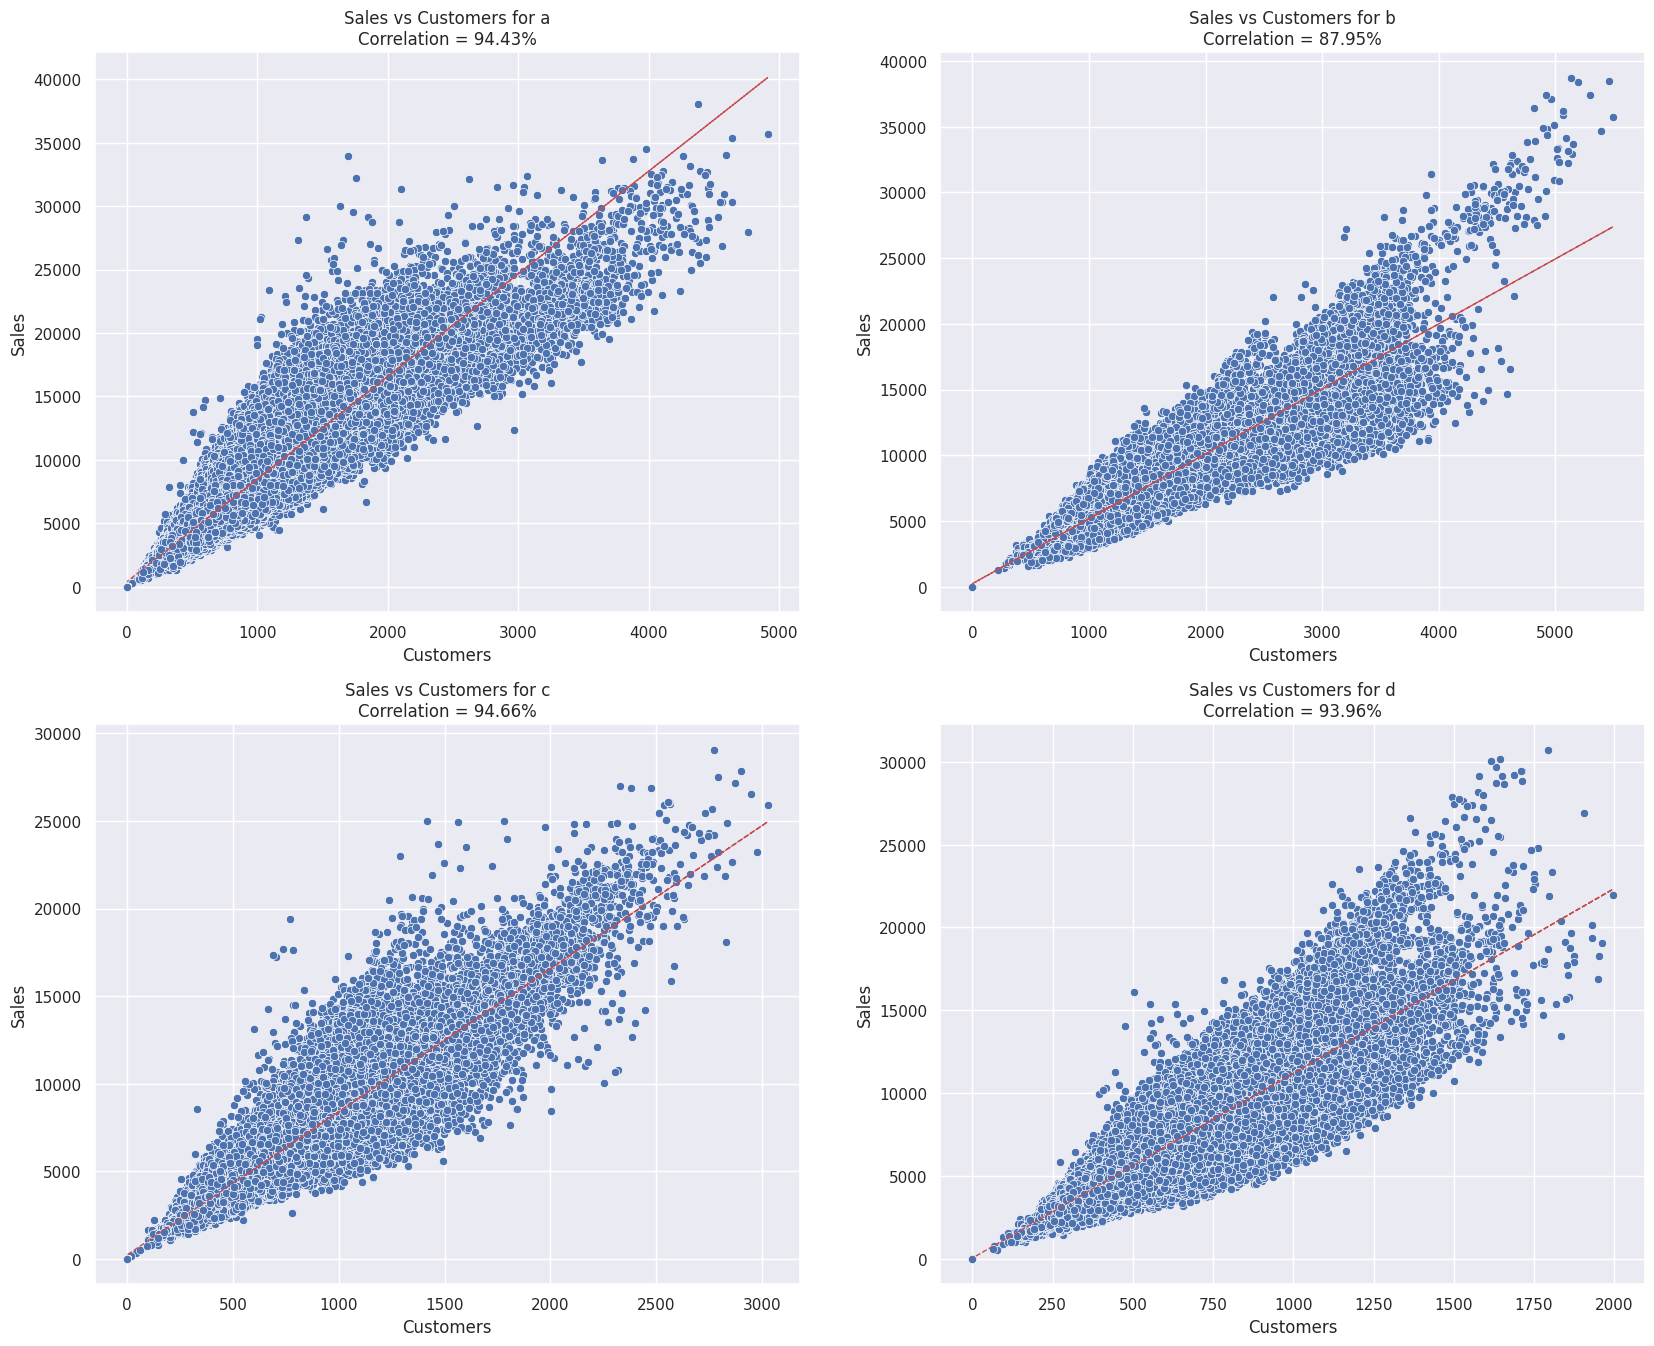

In [238]:
# generate scatter plots to check the linearity between sales and customers for each store type
scatter_plot_bw_sales_customers_with_feature_unique_values(total_df, 'StoreType')

Lets check if there is still ouliers in the data.

In [239]:
# get unique values of store types
store_types = sorted(total_df['StoreType'].unique().tolist())

# count and percentage of outliers in each store type
for store_type in store_types:
  count, perc = get_outlier_count_and_percentage(total_df[total_df['StoreType'] == store_type], 'Sales')
  print(f"Outliers in sales in store type {store_type} : {count} ({perc}%)")

Outliers in sales in store type a : 14940 (2.71%)
Outliers in sales in store type b : 247 (1.56%)
Outliers in sales in store type c : 3077 (2.25%)
Outliers in sales in store type d : 5549 (1.77%)


There are still outliers present in the data, which are detected using the above box plots. The Sales vs Customers scatter plot has been cleared of outliers and the remaining data maintains a good relationship between sales and customers. So, these outliers are just deviation from usual values and not errors in the measurement. Eliminating them can cause overfitting, so we will keep these outliers.

**Assortment**

Each assortment records sales in different range. So it is more appropriate to detect outliers separately for each assortment.

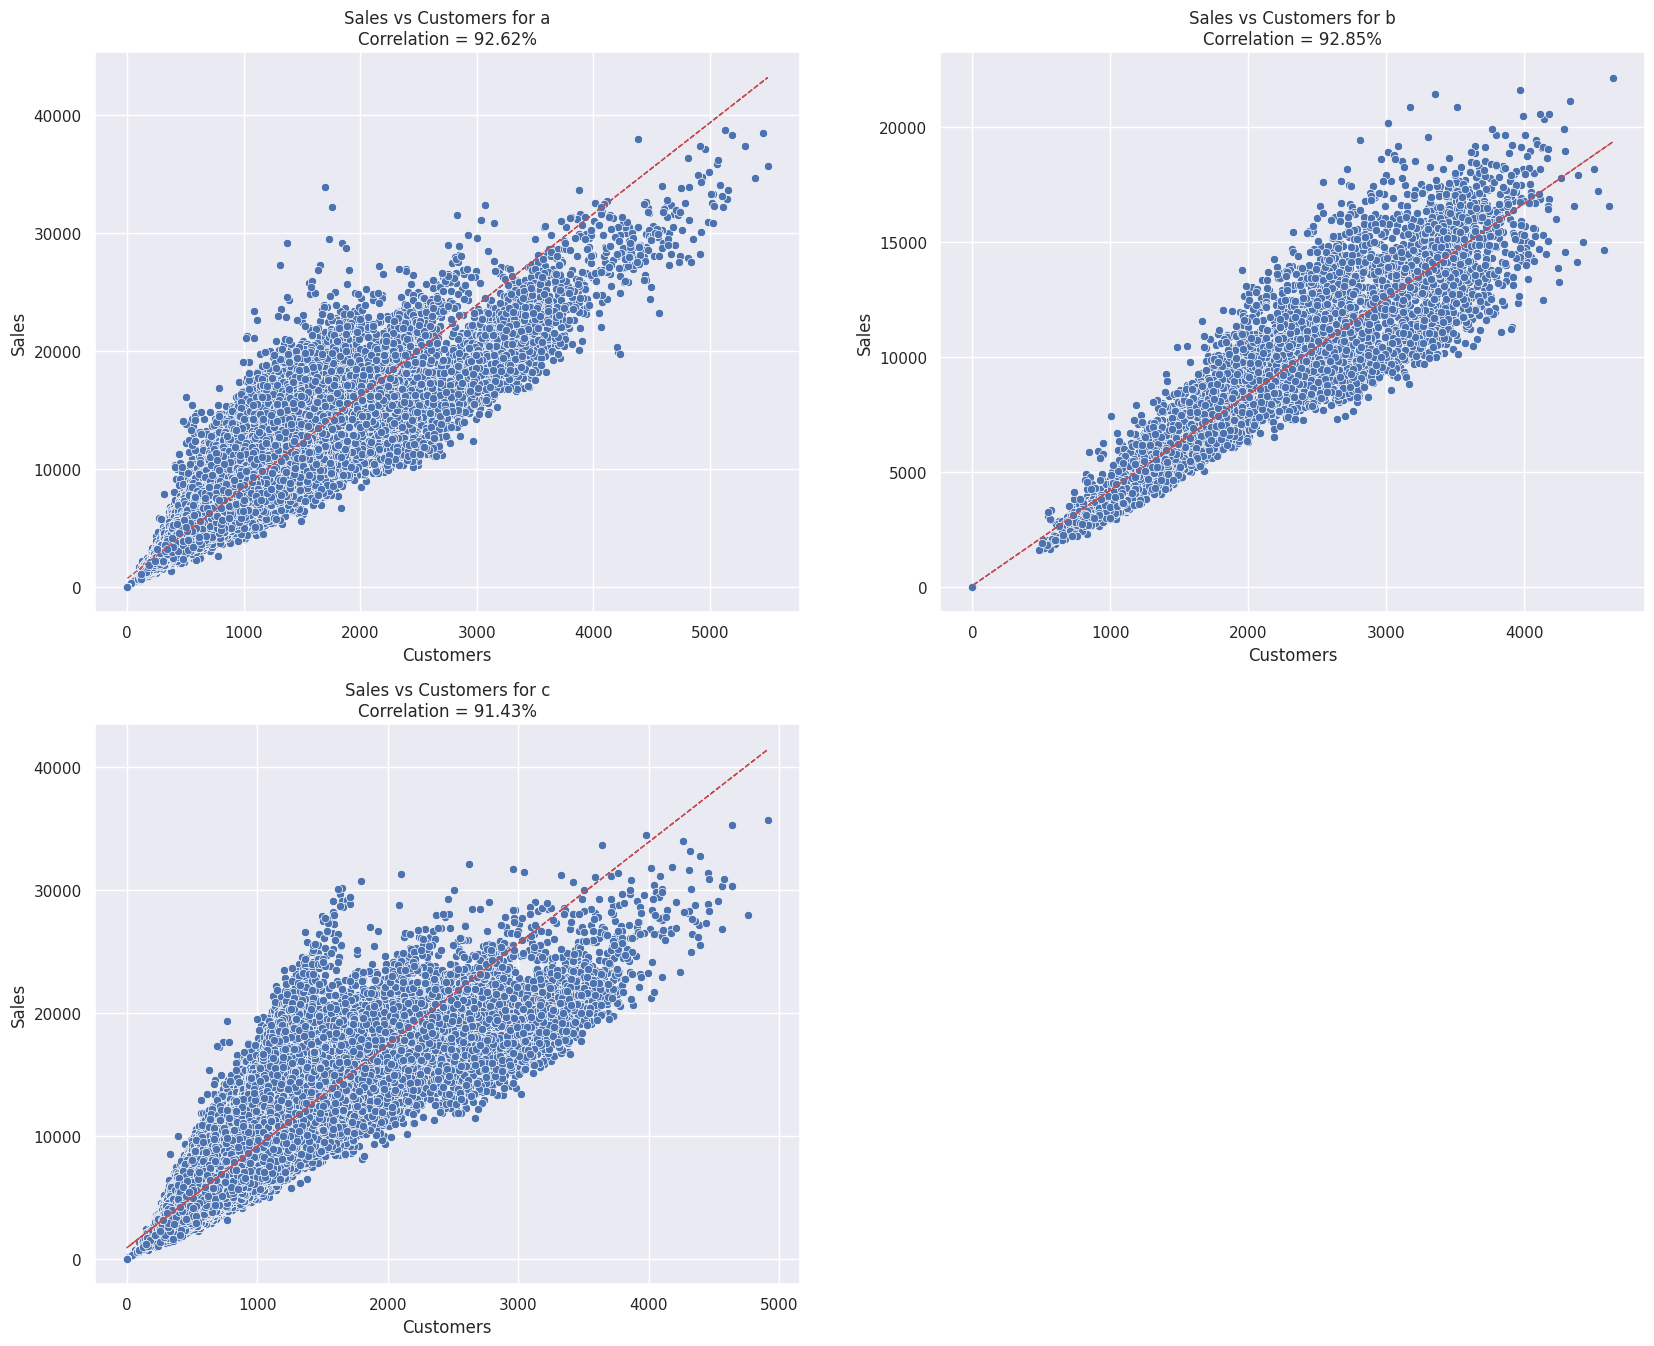

In [240]:
# generate scatter plots to check the linearity between sales and customers for each assortment
scatter_plot_bw_sales_customers_with_feature_unique_values(total_df, 'Assortment')

Outliers have been identified from the scatter plot. Now lets remove them.

In [241]:
# remove outliers with respect to assortments
a_filter = total_df[(total_df['Assortment'] == 'a') & (((total_df['Sales'] > 20000) & (total_df['Customers'] < 1000)) |
                                                             ((total_df['Sales'] > 27500) & (total_df['Customers'] < 2000)) |
                                                             ((total_df['Sales'] > 31000) & (total_df['Customers'] < 3250)) |
                                                              (total_df['Sales'] > 35000))].index
total_df.drop(a_filter, inplace=True)

Now lets check if the outliers are removed

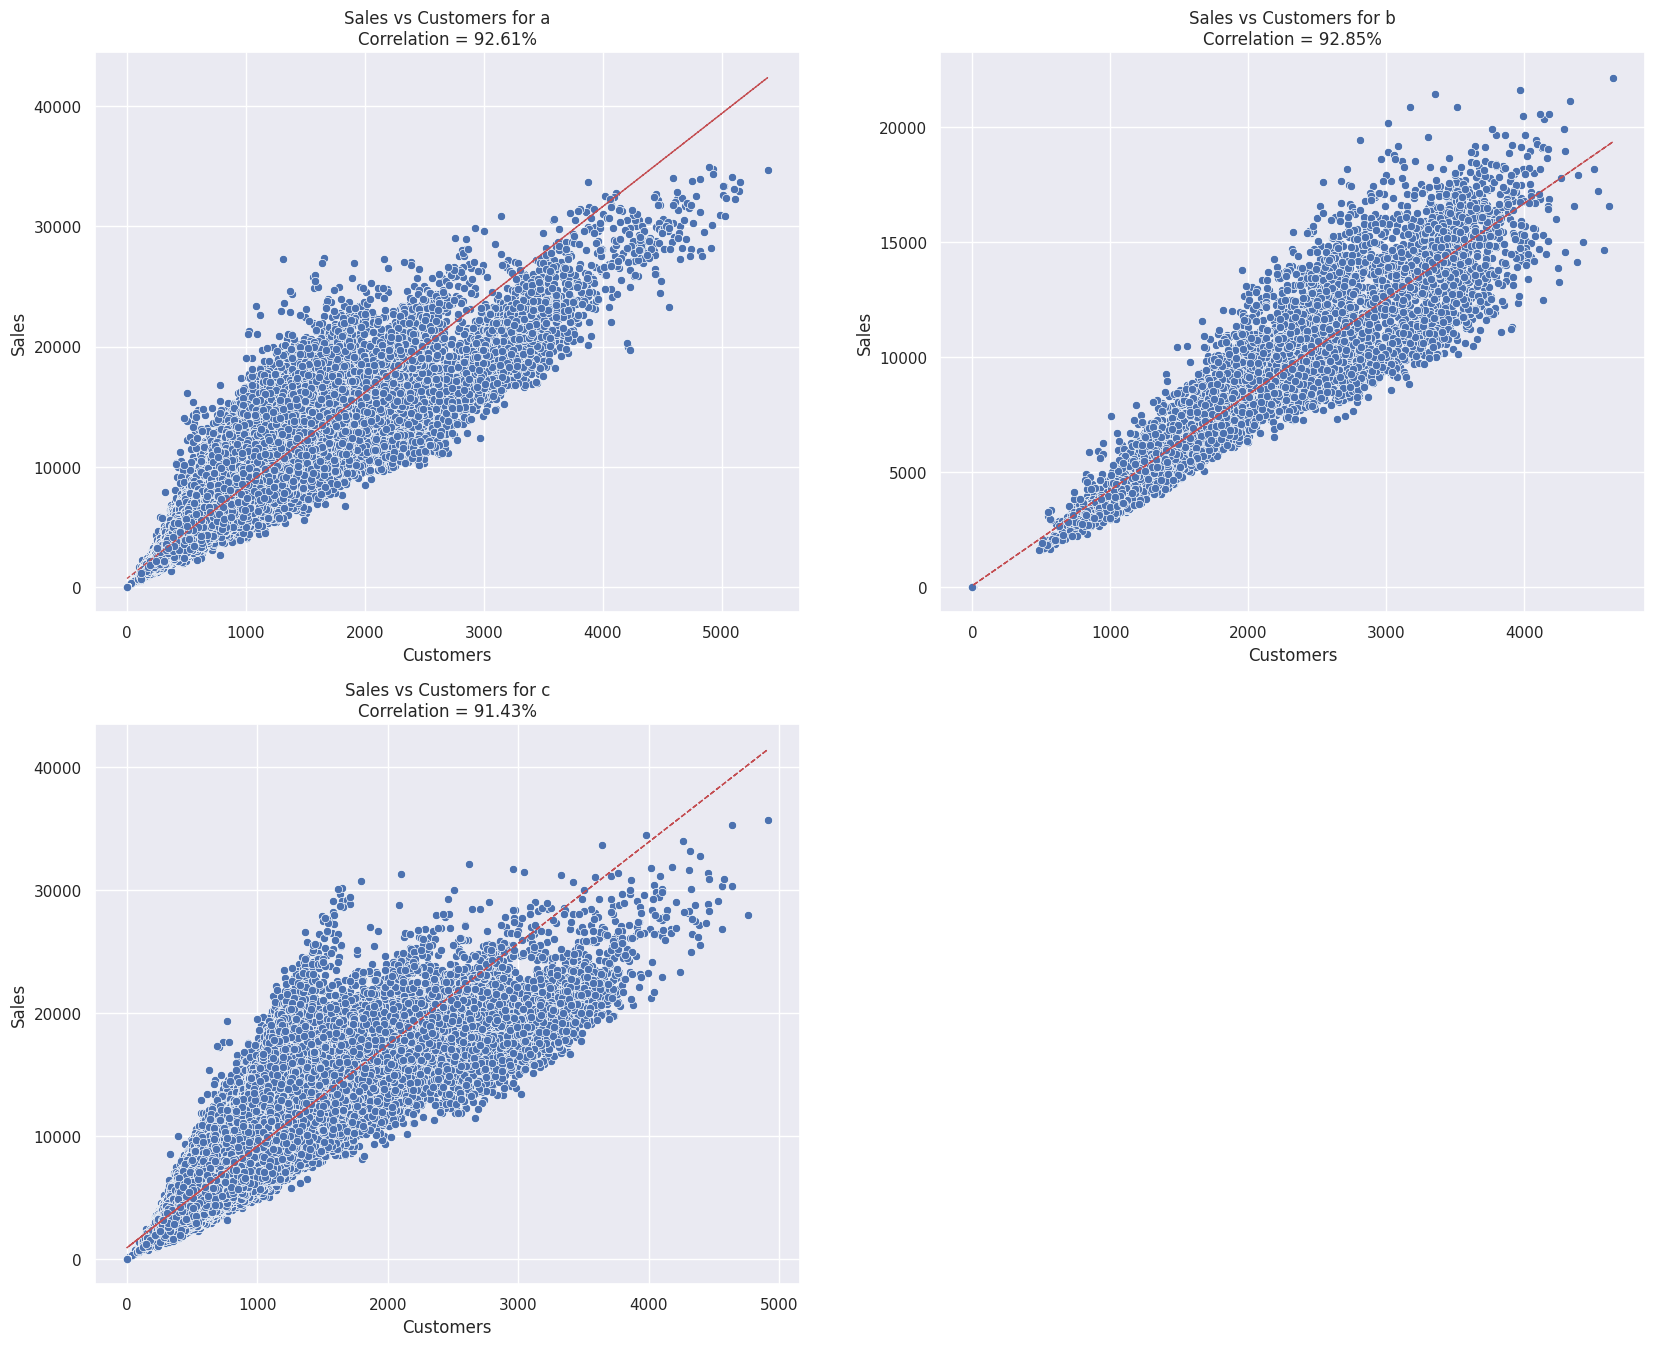

In [242]:
# generate scatter plots to check the linearity between sales and customers for each store type
scatter_plot_bw_sales_customers_with_feature_unique_values(total_df, 'Assortment')

Lets check if there is still ouliers in the data.

In [243]:
# get unique values of assortment
assortments = sorted(total_df['Assortment'].unique().tolist())

# count and percentage of outliers in each store type
for assortment in assortments:
  count, perc = get_outlier_count_and_percentage(total_df[total_df['Assortment'] == assortment], 'Sales')
  print(f"Outliers in sales in assortment {assortment} : {count} ({perc}%)")

Outliers in sales in assortment a : 12384 (2.3%)
Outliers in sales in assortment b : 13 (0.16%)
Outliers in sales in assortment c : 13735 (2.91%)


There are still outliers present in the data, which are detected using the above box plots. The Sales vs Customers scatter plot has been cleared of outliers and the remaining data maintains a good relationship between sales and customers. So, these outliers are just deviation from usual values and not errors in the measurement. Eliminating them can cause overfitting, so we will keep these outliers.

### Competition Distance

Lets check for outliers in competition distance with a box plot.

Outliers in competition distance : 99158 (9.75%)


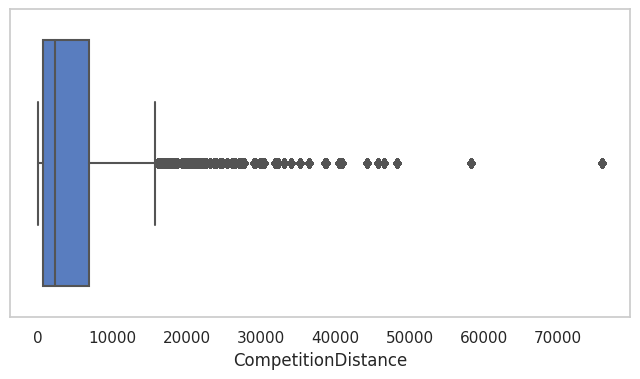

In [244]:
# generate a box plot for competition distance
generate_horizontal_box_plot(total_df, 'CompetitionDistance')

# count and percentage of outliers in competition distance
count, perc = get_outlier_count_and_percentage(total_df, 'CompetitionDistance')
print(f"Outliers in competition distance : {count} ({perc}%)")

Almost 10% of data are outliers and removing them will cause the loss of useful information. What we can do is eliminate only a certain portion of outliers.

There are three options for the section of outliers that we can remove:
1. Competition distance > 55000
2. Competition distance > 44000
3. Competition distance > 37500

Lets check how much data will be removed in all of these options and find which option will remove enough outliers with minimal loss of information.

In [245]:
# count and percentage of data above different values
for limit in (55000, 44000, 37500):
  count = total_df[total_df['CompetitionDistance'] > limit].shape[0]
  perc = round(count/total_df.shape[0]*100, 2)
  print(f"Count & percentage of data above {limit} : {count} ({perc}%)")

Count & percentage of data above 55000 : 1884 (0.19%)
Count & percentage of data above 44000 : 5652 (0.56%)
Count & percentage of data above 37500 : 9420 (0.93%)


We can choose the 3rd option since it clears the most outliers without losing much data.

## Feature Transformation

Transformation of numerical features is important because algorithms like linear regression, which assumes normal distribution, performs better when features are close to Normal Distribution.

Lets check whether all important numerical features have a normal distribution.

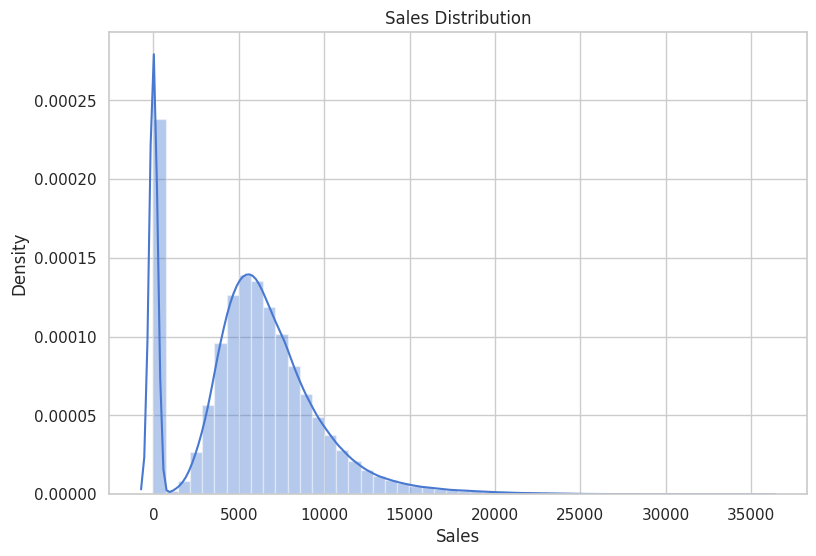

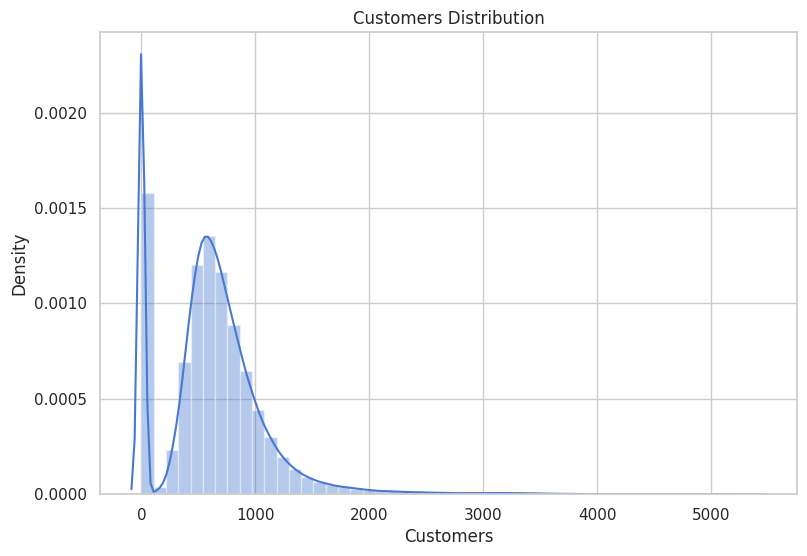

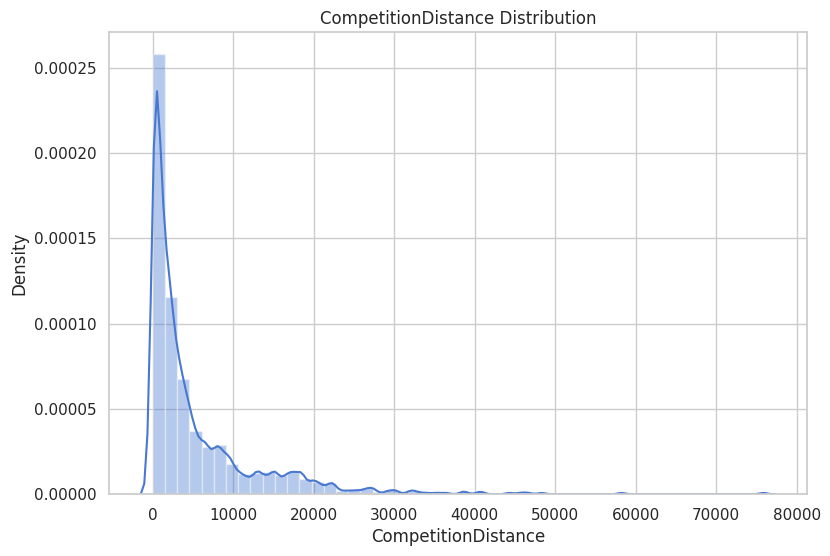

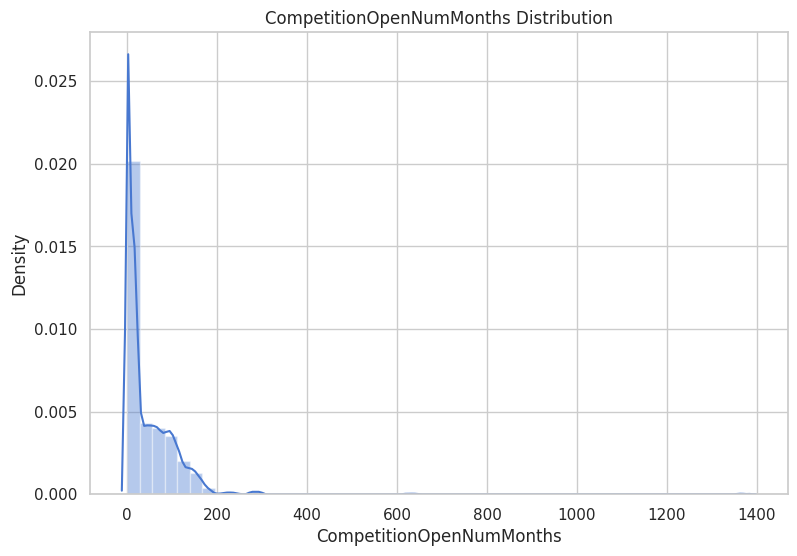

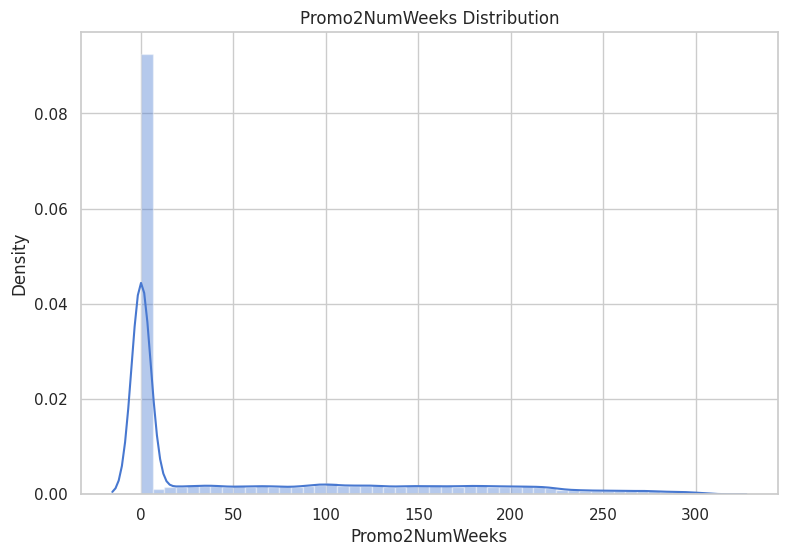

In [246]:
# numerical features
numerical_features = ['Sales', 'Customers', 'CompetitionDistance', 'CompetitionOpenNumMonths', 'Promo2NumWeeks']

# generate density plot for numerical features
for feature in numerical_features:
  plt.figure(figsize=(9, 6))
  sns.distplot(total_df[feature]).set(title=f'{feature} Distribution')
  plt.show()

All these features are positively skewed but linear regression assumes normal distribution. So, they must be transformed to normal distribution before forecasting sales.

Sales, customers,  competition open number of months and promo 2 number of weeks have zero values while competition distance has only positive values. So sales, customers, competition open number of months and promo 2 number of weeks are square root transformed and competition distance is log transformed.

In [247]:
# square root transformation of sales, customers, competition open number of months and promo 2 number of weeks
total_df['Sales'] = np.sqrt(total_df['Sales'])
total_df['Customers'] = np.sqrt(total_df['Customers'])
total_df['CompetitionOpenNumMonths'] = np.sqrt(total_df['CompetitionOpenNumMonths'])
total_df['Promo2NumWeeks'] = np.sqrt(total_df['Promo2NumWeeks'])

# log transformation of competition distance
total_df['CompetitionDistance'] = np.log(total_df['CompetitionDistance'])

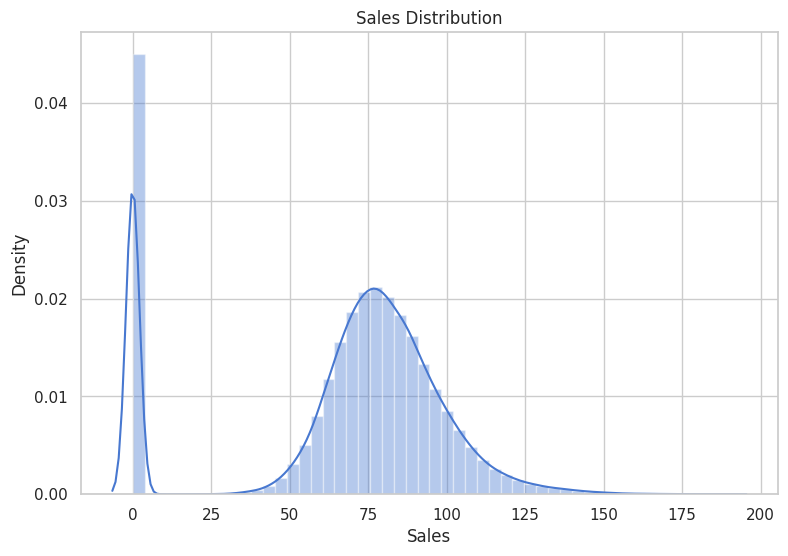

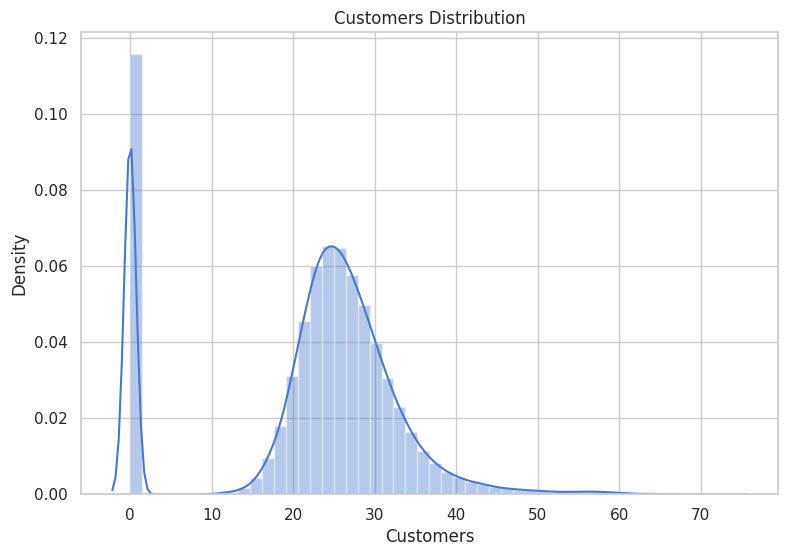

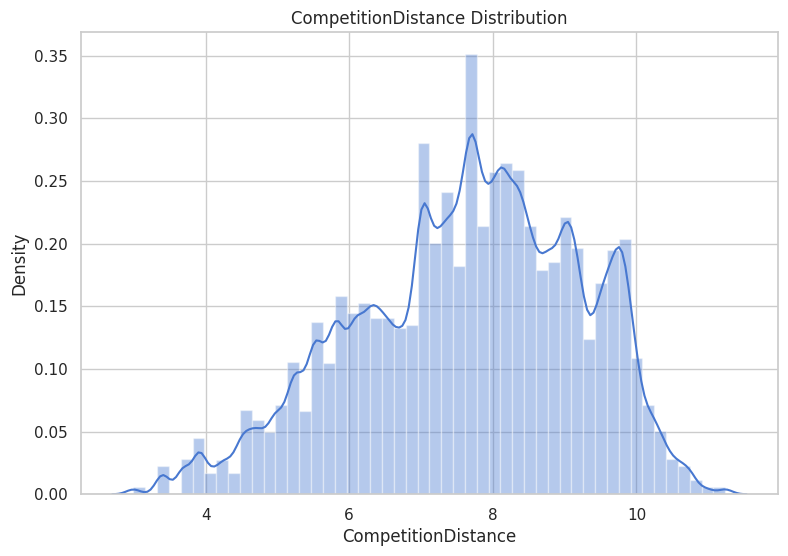

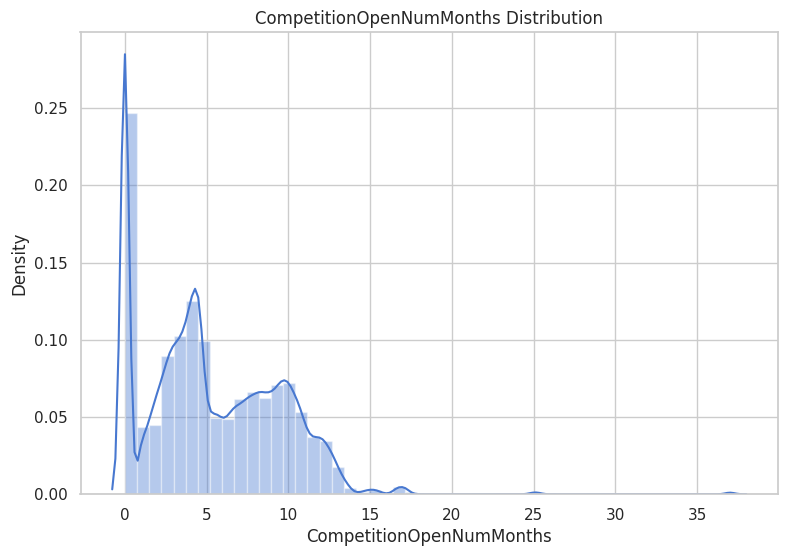

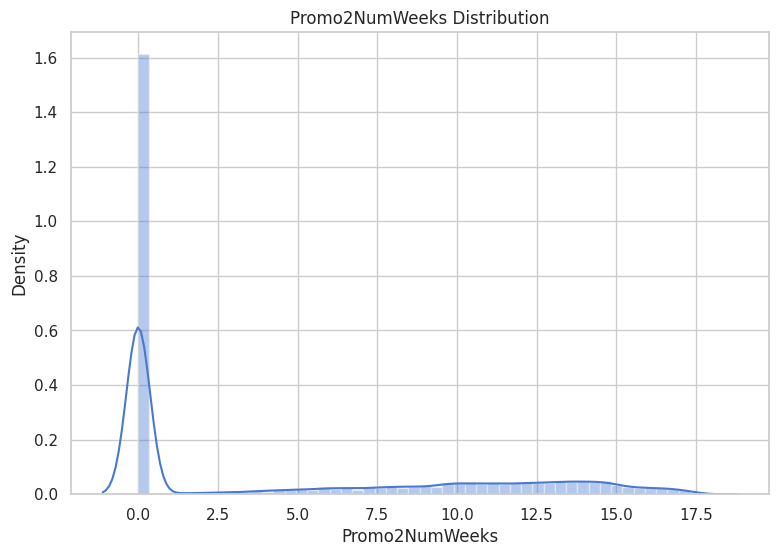

In [248]:
# numerical features
numerical_features = ['Sales', 'Customers', 'CompetitionDistance', 'CompetitionOpenNumMonths', 'Promo2NumWeeks']

# generate density plot for numerical features
for feature in numerical_features:
  plt.figure(figsize=(9, 6))
  sns.distplot(total_df[feature]).set(title=f'{feature} Distribution')
  plt.show()

In [249]:
# binary encoding day of week
bin = ce.BinaryEncoder(cols=['DayOfWeek']).fit_transform(total_df['DayOfWeek'])
total_df = pd.concat([total_df, bin], axis=1)
total_df.drop('DayOfWeek', axis=1, inplace=True)

# binary encoding week of year
bin = ce.BinaryEncoder(cols=['WeekOfYear']).fit_transform(total_df['WeekOfYear'])
total_df = pd.concat([total_df, bin], axis=1)
total_df.drop('WeekOfYear', axis=1, inplace=True)

In [250]:
# one hot encoding store type and assortment
ohe = OneHotEncoder(sparse=False, dtype=int)
ohe.fit(total_df[['StoreType', 'Assortment']])
encoded_features = list(ohe.get_feature_names_out(['StoreType', 'Assortment']))
total_df[encoded_features] = ohe.transform(total_df[['StoreType', 'Assortment']])
total_df.drop(['StoreType', 'Assortment'], axis=1, inplace=True)

In [251]:
# dummying promo interval
total_df = pd.get_dummies(total_df, columns=['PromoInterval'])

In [252]:
total_df.head()

Sales  Customers  Open  Promo  StateHoliday  SchoolHoliday  \
0   72.546537  23.558438     1      1           0.0              1   
1   77.871689  25.000000     1      1           0.0              1   
2   91.181138  28.653098     1      1           0.0              1   
3  118.300465  38.704005     1      1           0.0              1   
4   69.440622  23.643181     1      1           0.0              1   

   CompetitionDistance  CompetitionOpenNumMonths  Promo2NumWeeks  DayOfWeek_0  \
0             7.146772                  9.055385        0.000000            0   
1             6.345636                  9.591663       16.673332            0   
2             9.556055                 10.148892       15.000000            0   
3             6.429719                  8.366600        0.000000            0   
4            10.305948                  1.732051        0.000000            0   

   DayOfWeek_1  DayOfWeek_2  WeekOfYear_0  WeekOfYear_1  WeekOfYear_2  \
0            0            1             0             0             0   
1            0            1             0             0             0   
2            0            1             0             0             0   
3            0            1             0             0             0   
4            0            1             0             0             0   

   WeekOfYear_3  WeekOfYear_4  WeekOfYear_5  StoreType_a  StoreType_b  \
0             0             0             1            0            0   
1             0             0             1            1            0   
2             0             0             1            1            0   
3             0             0             1            0            0   
4             0             0             1            1            0   

   StoreType_c  StoreType_d  Assortment_a  Assortment_b  Assortment_c  \
0            1            0             1             0             0   
1            0            0             1             0             0   
2            0            0             1             0             0   
3            1            0             0             0             1   
4            0            0             1             0             0   

   PromoInterval_0  PromoInterval_Feb,May,Aug,Nov  \
0                1                              0   
1                0                              0   
2                0                              0   
3                1                              0   
4                1                              0   

   PromoInterval_Jan,Apr,Jul,Oct  PromoInterval_Mar,Jun,Sept,Dec  
0                              0                               0  
1                              1                               0  
2                              1                               0  
3                              0                               0  
4                              0                               0

To overcome dummy variable trap, one resultant feature from each encoded feature must be removed. We can use correlation matrix to decide which features to remove.

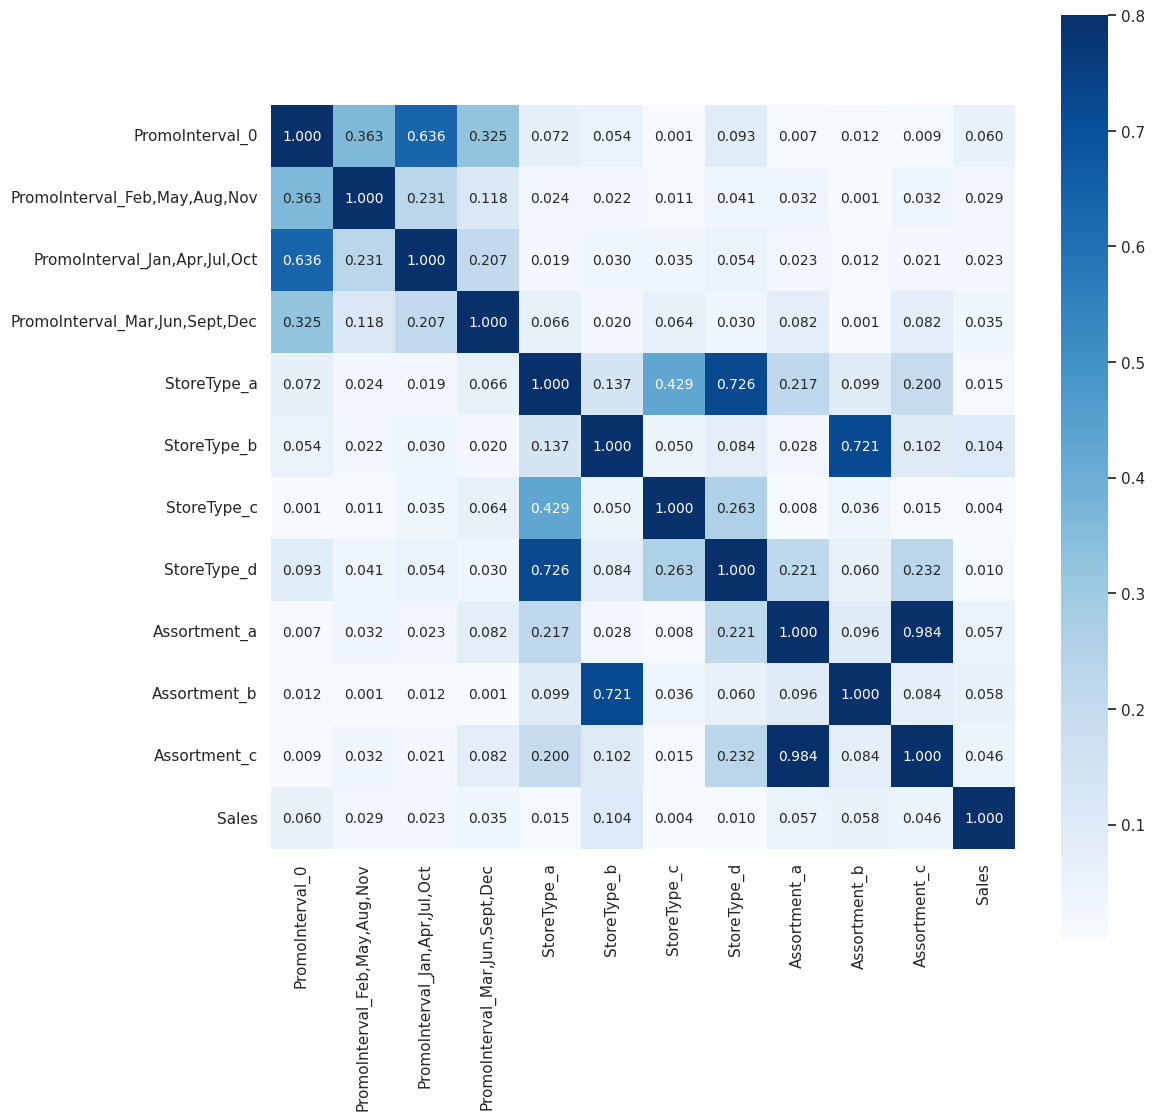

In [253]:
corr_mat = total_df.loc[:, ['PromoInterval_0', 'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec',
                               'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c', 'Sales']].corr().abs()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr_mat, annot = True, fmt='.3f', annot_kws={'size': 10},  vmax=.8, square=True, cmap="Blues");

In [254]:
# #no of observations for closed stores with 0 sales
# print((total_df[total_df.Open == 0]).shape)
# #since the stores closed had 0 sale value; removing the irrelevant part
# total_df = total_df[total_df.Open != 0]
# total_df.drop('Open', axis=1, inplace=True)

In [255]:
total_df.head(3)

Sales  Customers  Open  Promo  StateHoliday  SchoolHoliday  \
0  72.546537  23.558438     1      1           0.0              1   
1  77.871689  25.000000     1      1           0.0              1   
2  91.181138  28.653098     1      1           0.0              1   

   CompetitionDistance  CompetitionOpenNumMonths  Promo2NumWeeks  DayOfWeek_0  \
0             7.146772                  9.055385        0.000000            0   
1             6.345636                  9.591663       16.673332            0   
2             9.556055                 10.148892       15.000000            0   

   DayOfWeek_1  DayOfWeek_2  WeekOfYear_0  WeekOfYear_1  WeekOfYear_2  \
0            0            1             0             0             0   
1            0            1             0             0             0   
2            0            1             0             0             0   

   WeekOfYear_3  WeekOfYear_4  WeekOfYear_5  StoreType_a  StoreType_b  \
0             0             0             1            0            0   
1             0             0             1            1            0   
2             0             0             1            1            0   

   StoreType_c  StoreType_d  Assortment_a  Assortment_b  Assortment_c  \
0            1            0             1             0             0   
1            0            0             1             0             0   
2            0            0             1             0             0   

   PromoInterval_0  PromoInterval_Feb,May,Aug,Nov  \
0                1                              0   
1                0                              0   
2                0                              0   

   PromoInterval_Jan,Apr,Jul,Oct  PromoInterval_Mar,Jun,Sept,Dec  
0                              0                               0  
1                              1                               0  
2                              1                               0

In [256]:
# # Create a new features which shows the number if months passed since competition started
# total_df["CompetitionOpenNumMonths"] = (total_df['Year'] - total_df['CompetitionOpenSinceYear'] ) * 12 + (total_df['Month'] - total_df["CompetitionOpenSinceMonth"])
# # Create a new feature which shows the number of weeks passed since promo 2
# total_df["Promo2NumWeeks"] = (total_df['Year'] - total_df['Promo2SinceYear'] ) * 52 + (total_df['WeekOfYear'] - total_df["Promo2SinceWeek"])

PromoInterval_Jan,Apr,Jul,Oct, StoreType_c & Assortment_b have the least correlation to Sales. So, they are removed.

In [257]:
# drop PromoInterval_Jan,Apr,Jul,Oct, StoreType_c & Assortment_b
total_df.drop(['PromoInterval_Jan,Apr,Jul,Oct', 'StoreType_c', 'Assortment_b'], axis=1, inplace=True)

In [258]:
total_df.head()

Sales  Customers  Open  Promo  StateHoliday  SchoolHoliday  \
0   72.546537  23.558438     1      1           0.0              1   
1   77.871689  25.000000     1      1           0.0              1   
2   91.181138  28.653098     1      1           0.0              1   
3  118.300465  38.704005     1      1           0.0              1   
4   69.440622  23.643181     1      1           0.0              1   

   CompetitionDistance  CompetitionOpenNumMonths  Promo2NumWeeks  DayOfWeek_0  \
0             7.146772                  9.055385        0.000000            0   
1             6.345636                  9.591663       16.673332            0   
2             9.556055                 10.148892       15.000000            0   
3             6.429719                  8.366600        0.000000            0   
4            10.305948                  1.732051        0.000000            0   

   DayOfWeek_1  DayOfWeek_2  WeekOfYear_0  WeekOfYear_1  WeekOfYear_2  \
0            0            1             0             0             0   
1            0            1             0             0             0   
2            0            1             0             0             0   
3            0            1             0             0             0   
4            0            1             0             0             0   

   WeekOfYear_3  WeekOfYear_4  WeekOfYear_5  StoreType_a  StoreType_b  \
0             0             0             1            0            0   
1             0             0             1            1            0   
2             0             0             1            1            0   
3             0             0             1            0            0   
4             0             0             1            1            0   

   StoreType_d  Assortment_a  Assortment_c  PromoInterval_0  \
0            0             1             0                1   
1            0             1             0                0   
2            0             1             0                0   
3            0             0             1                1   
4            0             1             0                1   

   PromoInterval_Feb,May,Aug,Nov  PromoInterval_Mar,Jun,Sept,Dec  
0                              0                               0  
1                              0                               0  
2                              0                               0  
3                              0                               0  
4                              0                               0

# Modelling

## Train-Test Split

First, we will separate input features and target feature. Lets also remove customers and promo since tfor the period which is under consideration for forecasting, they won't be available until the mentioned period is over.

In [259]:
# independant features (input)
X = total_df.drop(['Sales', 'Customers', 'Promo'], axis=1)

# dependant feature (target)
y = total_df['Sales']

Now, lets split them into training and test data with 25% test data.

In [260]:
# split the datasets to training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(711994, 23)
(305141, 23)


In [261]:
# create a dataframe to store metrics related to models
metrics_table = pd.DataFrame(columns=['Regression_Model', 'Train_R2', 'Test_R2', 'Train_RMSE', 'Test_RMSE', 'Train_RMSPE', 'Test_RMSPE'])

## Model Training

In [262]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [263]:
# define a function to calculate root mean squared percentage error
# returns an array
def calculate_rmspe(y_actual, y_pred):
  return (np.sqrt(np.mean(np.square(y_actual.to_numpy() - y_pred))) / np.mean(y_actual.to_numpy())) * 100

In [264]:
# define a function to calculate metrics
# returns a dictionary
def calculate_model_metrics(y_train, y_train_pred, y_test, y_test_pred):
  metrics_dict = {}

  metrics_dict['Train_R2'] = r2_score(y_train, y_train_pred)
  metrics_dict['Test_R2'] = r2_score(y_test, y_test_pred)
  metrics_dict['Train_RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
  metrics_dict['Test_RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)
  metrics_dict['Train_RMSPE'] = calculate_rmspe(y_train, y_train_pred)
  metrics_dict['Test_RMSPE'] = calculate_rmspe(y_test, y_test_pred)

  return metrics_dict

### ML Model - 1

### Linear Regression

In [265]:
# train data with linear regression
linear_reg = LinearRegression()
liner_reg_model = Pipeline([('scaler', StandardScaler()), ('linear_reg', linear_reg)])
liner_reg_model.fit(X_train, y_train)

# predict the train and test data
y_train_pred = liner_reg_model.predict(X_train)
y_test_pred = liner_reg_model.predict(X_test)

In [266]:
# model evaluation
model_evaluation = calculate_model_metrics(y_train, y_train_pred, y_test, y_test_pred)

# print the results of model evaluation
print(f"Training Data\nR2    : {model_evaluation['Train_R2']}\nRMSE  : {model_evaluation['Train_RMSE']}\nRMSPE : {model_evaluation['Train_RMSPE']}%")
print(f"\nTesting Data\nR2    : {model_evaluation['Test_R2']}\nRMSE  : {model_evaluation['Test_RMSE']}\nRMSPE : {model_evaluation['Test_RMSPE']}%")

# add metrics to metrics table
metrics_table.loc[len(metrics_table.index)] = ['Linear', model_evaluation['Train_R2'], model_evaluation['Test_R2'],
                                                         model_evaluation['Train_RMSE'], model_evaluation['Test_RMSE'],
                                                         model_evaluation['Train_RMSPE'], model_evaluation['Test_RMSPE']]

Training Data
R2    : 0.8074736504351585
RMSE  : 15.147058656166076
RMSPE : 22.37524756678053%

Testing Data
R2    : 0.8072714229489536
RMSE  : 15.1339129513316
RMSPE : 22.364940384488886%


In [267]:
# actual vs predicted target data
regression_Dataframe = pd.DataFrame(zip(y_test, y_test_pred), columns = ['actual', 'pred'])
regression_Dataframe

actual       pred
0         0.000000  -3.261274
1        76.446059  81.327260
2        81.308056  70.982689
3       101.276848  86.059769
4        88.572005  87.319138
...            ...        ...
305136   74.087786  82.193674
305137   81.424812  86.480779
305138   87.931792  80.096362
305139   77.768888  78.913490
305140   95.519631  83.675941

[305141 rows x 2 columns]

### Ridge Regression with Hyperparameter Tuning

In [268]:
# train data with ridge regression
ridge = Ridge()
ridge_model = Pipeline([('scaler', StandardScaler()), ('ridge', ridge)])
parameters = {'ridge__alpha':[1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1, 5]}

# GridSearchCV is used for hyperparameter tuning because Ridge() have only one hyperparameter
# cv=3 since dataset is large
ridge_reg_model = GridSearchCV(ridge_model, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_reg_model.fit(X_train, y_train)

# print the best parameter values and negative mean squared error
print("The best parameters for ridge regression: ")
for key, value in ridge_reg_model.best_params_.items():
  print(f"{key}={value}")
print(f"\nNegative mean squared error: {ridge_reg_model.best_score_}")

# predict the train and test data
y_train_pred = ridge_reg_model.predict(X_train)
y_test_pred = ridge_reg_model.predict(X_test)

The best parameters for ridge regression: 
ridge__alpha=1

Negative mean squared error: -229.45201756003624


In [269]:
# model evaluation
model_evaluation = calculate_model_metrics(y_train, y_train_pred, y_test, y_test_pred)

# print the results of model evaluation
print(f"Training Data\nR2    : {model_evaluation['Train_R2']}\nRMSE  : {model_evaluation['Train_RMSE']}\nRMSPE : {model_evaluation['Train_RMSPE']}%")
print(f"\nTesting Data\nR2    : {model_evaluation['Test_R2']}\nRMSE  : {model_evaluation['Test_RMSE']}\nRMSPE : {model_evaluation['Test_RMSPE']}%")

# add metrics to metrics table
metrics_table.loc[len(metrics_table.index)] = ['Ridge', model_evaluation['Train_R2'], model_evaluation['Test_R2'],
                                                        model_evaluation['Train_RMSE'], model_evaluation['Test_RMSE'],
                                                        model_evaluation['Train_RMSPE'], model_evaluation['Test_RMSPE']]

Training Data
R2    : 0.8074736504063826
RMSE  : 15.14705865729805
RMSPE : 22.375247568452686%

Testing Data
R2    : 0.8072714461161971
RMSE  : 15.133912041733602
RMSPE : 22.364939040282326%


In [270]:
# actual vs predicted target data
regression_Dataframe = pd.DataFrame(zip(y_test, y_test_pred), columns = ['actual', 'pred'])
regression_Dataframe

actual       pred
0         0.000000  -3.261156
1        76.446059  81.327184
2        81.308056  70.982715
3       101.276848  86.059780
4        88.572005  87.319075
...            ...        ...
305136   74.087786  82.193645
305137   81.424812  86.480710
305138   87.931792  80.096353
305139   77.768888  78.913435
305140   95.519631  83.675962

[305141 rows x 2 columns]

### Lasso Regression with Hyperparameter Tuning

In [271]:
# train data with lasso regression
lasso = Lasso()
lasso_model = Pipeline([('scaler', StandardScaler()), ('lasso', lasso)])
parameters = {'lasso__alpha':[1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1, 5]}

# GridSearchCV is used for hyperparameter tuning because Lasso() have only one hyperparameter
# cv=3 since dataset is large
lasso_reg_model = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_reg_model.fit(X_train, y_train)

# print the best parameter values and negative mean squared error
print("The best parameters for lasso regression: ")
for key, value in lasso_reg_model.best_params_.items():
  print(f"{key}={value}")
print(f"\nNegative mean squared error: {lasso_reg_model.best_score_}")

# predict the train and test data
y_train_pred = lasso_reg_model.predict(X_train)
y_test_pred = lasso_reg_model.predict(X_test)

The best parameters for lasso regression: 
lasso__alpha=0.0001

Negative mean squared error: -229.4520096494931


In [272]:
# model evaluation
model_evaluation = calculate_model_metrics(y_train, y_train_pred, y_test, y_test_pred)

# print the results of model evaluation
print(f"Training Data\nR2    : {model_evaluation['Train_R2']}\nRMSE  : {model_evaluation['Train_RMSE']}\nRMSPE : {model_evaluation['Train_RMSPE']}%")
print(f"\nTesting Data\nR2    : {model_evaluation['Test_R2']}\nRMSE  : {model_evaluation['Test_RMSE']}\nRMSPE : {model_evaluation['Test_RMSPE']}%")

# add metrics to metrics table
metrics_table.loc[len(metrics_table.index)] = ['Lasso', model_evaluation['Train_R2'], model_evaluation['Test_R2'],
                                                        model_evaluation['Train_RMSE'], model_evaluation['Test_RMSE'],
                                                        model_evaluation['Train_RMSPE'], model_evaluation['Test_RMSPE']]

Training Data
R2    : 0.807473647604353
RMSE  : 15.14705876752324
RMSPE : 22.37524773127743%

Testing Data
R2    : 0.8072716359166179
RMSE  : 15.133904589740826
RMSPE : 22.364928027705826%


In [273]:
# actual vs predicted target data
regression_Dataframe = pd.DataFrame(zip(y_test, y_test_pred), columns = ['actual', 'pred'])
regression_Dataframe

actual       pred
0         0.000000  -3.260484
1        76.446059  81.327267
2        81.308056  70.983571
3       101.276848  86.059190
4        88.572005  87.318508
...            ...        ...
305136   74.087786  82.193095
305137   81.424812  86.480247
305138   87.931792  80.096327
305139   77.768888  78.913433
305140   95.519631  83.675864

[305141 rows x 2 columns]

### Elastic Net Regression with Hyperparameter Tuning

In [274]:
# train data with elastic net regression
elastic_net = ElasticNet()
elastic_net_model = Pipeline([('scaler', StandardScaler()), ('elastic_net', elastic_net)])
parameters = {
  'elastic_net__alpha':[1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1, 5],
  'elastic_net__l1_ratio':[0.3,0.4,0.5,0.6,0.7]
  }

# GridSearchCV is used for hyperparameter tuning because ElasticNet() have only two hyperparameters
# cv=3 since dataset is large
elastic_net_reg_model = GridSearchCV(elastic_net_model, parameters, scoring='neg_mean_squared_error', cv=3)
elastic_net_reg_model.fit(X_train, y_train)

# print the best parameter values and negative mean squared error
print("The best parameters for elastic net regression: ")
for key, value in elastic_net_reg_model.best_params_.items():
  print(f"{key}={value}")
print(f"\nNegative mean squared error: {elastic_net_reg_model.best_score_}")

# predict the train and test data
y_train_pred = elastic_net_reg_model.predict(X_train)
y_test_pred = elastic_net_reg_model.predict(X_test)

The best parameters for elastic net regression: 
elastic_net__alpha=1e-05
elastic_net__l1_ratio=0.7

Negative mean squared error: -229.45201677141597


In [275]:
# model evaluation
model_evaluation = calculate_model_metrics(y_train, y_train_pred, y_test, y_test_pred)

# print the results of model evaluation
print(f"Training Data\nR2    : {model_evaluation['Train_R2']}\nRMSE  : {model_evaluation['Train_RMSE']}\nRMSPE : {model_evaluation['Train_RMSPE']}%")
print(f"\nTesting Data\nR2    : {model_evaluation['Test_R2']}\nRMSE  : {model_evaluation['Test_RMSE']}\nRMSPE : {model_evaluation['Test_RMSPE']}%")

# add metrics to metrics table
metrics_table.loc[len(metrics_table.index)] = ['Elastic Net', model_evaluation['Train_R2'], model_evaluation['Test_R2'],
                                                              model_evaluation['Train_RMSE'], model_evaluation['Test_RMSE'],
                                                              model_evaluation['Train_RMSPE'], model_evaluation['Test_RMSPE']]

Training Data
R2    : 0.8074736502120681
RMSE  : 15.147058664941925
RMSPE : 22.375247579744222%

Testing Data
R2    : 0.8072714873594167
RMSE  : 15.13391042243205
RMSPE : 22.364936647273804%


In [276]:
# actual vs predicted target data
regression_Dataframe = pd.DataFrame(zip(y_test, y_test_pred), columns = ['actual', 'pred'])
regression_Dataframe

actual       pred
0         0.000000  -3.260966
1        76.446059  81.327097
2        81.308056  70.982807
3       101.276848  86.059751
4        88.572005  87.318960
...            ...        ...
305136   74.087786  82.193571
305137   81.424812  86.480594
305138   87.931792  80.096340
305139   77.768888  78.913368
305140   95.519631  83.675982

[305141 rows x 2 columns]

### Decision Tree Regression with Hyperparameter Tuning

In [277]:
# train data with decision tree regression
decision_tree = DecisionTreeRegressor()
parameters = {'max_depth': [5, 10, None],
              'min_samples_leaf': [1, 2, 5],
              'min_samples_split': [2, 5, 10],
              'max_leaf_nodes': [5, 20, 100],
              'max_features': ['auto', 'sqrt', 'log2']}

# RandomizedSearchCV is used for hyperparameter tuning because DecisionTreeRegressor() have multiple hyperparameters
# cv=3 & n_iter=10 since dataset is large
dt_reg = RandomizedSearchCV(estimator=decision_tree, param_distributions=parameters, n_iter=10, cv=3)
dt_reg.fit(X_train, y_train)

# print the best parameter values and negative mean squared error
print("The best parameters for decision tree regression: ")
for key, value in dt_reg.best_params_.items():
  print(f"{key}={value}")
print(f"\nNegative mean squared error: {dt_reg.best_score_}")

# predict the train and test data
y_train_pred = dt_reg.predict(X_train)
y_test_pred = dt_reg.predict(X_test)

The best parameters for decision tree regression: 
min_samples_split=5
min_samples_leaf=2
max_leaf_nodes=20
max_features=auto
max_depth=5

Negative mean squared error: 0.8111140800957796


In [278]:
# model evaluation
model_evaluation = calculate_model_metrics(y_train, y_train_pred, y_test, y_test_pred)

# print the results of model evaluation
print(f"Training Data\nR2    : {model_evaluation['Train_R2']}\nRMSE  : {model_evaluation['Train_RMSE']}\nRMSPE : {model_evaluation['Train_RMSPE']}%")
print(f"\nTesting Data\nR2    : {model_evaluation['Test_R2']}\nRMSE  : {model_evaluation['Test_RMSE']}\nRMSPE : {model_evaluation['Test_RMSPE']}%")

# add metrics to metrics table
metrics_table.loc[len(metrics_table.index)] = ['Decision Tree', model_evaluation['Train_R2'], model_evaluation['Test_R2'],
                                                                model_evaluation['Train_RMSE'], model_evaluation['Test_RMSE'],
                                                                model_evaluation['Train_RMSPE'], model_evaluation['Test_RMSPE']]

Training Data
R2    : 0.8111403656238222
RMSE  : 15.002125398989692
RMSPE : 22.16115203948413%

Testing Data
R2    : 0.8112909178451072
RMSE  : 14.975267033334571
RMSPE : 22.130492987463658%


In [279]:
# actual vs predicted target data
regression_Dataframe = pd.DataFrame(zip(y_test, y_test_pred), columns = ['actual', 'pred'])
regression_Dataframe

actual       pred
0         0.000000   0.000000
1        76.446059  78.588276
2        81.308056  77.366783
3       101.276848  84.215828
4        88.572005  88.928849
...            ...        ...
305136   74.087786  80.448805
305137   81.424812  88.928849
305138   87.931792  82.394498
305139   77.768888  84.954593
305140   95.519631  84.215828

[305141 rows x 2 columns]

In [280]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Defining objects
regg = LinearRegression()

# Fit the Algorithm
regg.fit(X_train, y_train)

training_score = regg.score(X_train, y_train)

# Predict on the model
y_pred = regg.predict(X_test)

# Calculating training accuracy
print("Train Score:", training_score)

# Calculating MSE
MSE = mean_squared_error((y_test),(y_pred))
print("MSE Score is:", MSE)

# Calculating testing accuracy
r2 = r2_score((y_test),(y_pred))
print("Test R2 is:", r2)

Train Score: 0.8074736504351585
MSE Score is: 229.0353212184824
Test R2 is: 0.8072714229489535


### Random Forest Regression with Hyperparameter Tuning

In [293]:
# train data with random forest regression
random_forest = RandomForestRegressor()
parameters = {'max_depth': [5, 10, None],
              'min_samples_leaf': [1, 2, 5],
              'min_samples_split': [2, 5, 10],
              'max_leaf_nodes': [5, 20, 100],
              'max_features': ['auto', 'sqrt', 'log2']}

# RandomizedSearchCV is used for hyperparameter tuning because RandomForestRegressor() have multiple hyperparameters
# cv=3 & n_iter=10 since dataset is large
rf_reg = RandomizedSearchCV(estimator=random_forest, param_distributions=parameters, n_iter=10, cv=3)
rf_reg.fit(X_train, y_train)

# print the best parameter values and negative mean squared error
print("The best parameters for random forest regression: ")
for key, value in rf_reg.best_params_.items():
  print(f"{key}={value}")
print(f"\nNegative mean squared error: {rf_reg.best_score_}")

# predict the train and test data
y_train_pred = rf_reg.predict(X_train)
y_test_pred = rf_reg.predict(X_test)

The best parameters for random forest regression: 
min_samples_split=5
min_samples_leaf=2
max_leaf_nodes=100
max_features=auto
max_depth=10

Negative mean squared error: 0.8388945311128545


In [294]:
# model evaluation
model_evaluation = calculate_model_metrics(y_train, y_train_pred, y_test, y_test_pred)

# print the results of model evaluation
print(f"Training Data\nR2    : {model_evaluation['Train_R2']}\nRMSE  : {model_evaluation['Train_RMSE']}\nRMSPE : {model_evaluation['Train_RMSPE']}%")
print(f"\nTesting Data\nR2    : {model_evaluation['Test_R2']}\nRMSE  : {model_evaluation['Test_RMSE']}\nRMSPE : {model_evaluation['Test_RMSPE']}%")

# add metrics to metrics table
metrics_table.loc[len(metrics_table.index)] = ['Random Forest', model_evaluation['Train_R2'], model_evaluation['Test_R2'],
                                                                model_evaluation['Train_RMSE'], model_evaluation['Test_RMSE'],
                                                                model_evaluation['Train_RMSPE'], model_evaluation['Test_RMSPE']]

Training Data
R2    : 0.8387350146271539
RMSE  : 13.862873483859351
RMSPE : 20.478248168798096%

Testing Data
R2    : 0.838552445023317
RMSE  : 13.851407632467934
RMSPE : 20.46965031037411%


In [295]:
# actual vs predicted target data
regression_Dataframe = pd.DataFrame(zip(y_test, y_test_pred), columns = ['actual', 'pred'])
regression_Dataframe

actual       pred
0         0.000000   0.000000
1        76.446059  77.427515
2        81.308056  74.869726
3       101.276848  88.811780
4        88.572005  83.945545
...            ...        ...
305136   74.087786  85.140923
305137   81.424812  83.945545
305138   87.931792  82.397735
305139   77.768888  84.085030
305140   95.519631  88.811780

[305141 rows x 2 columns]

### XGBoost Regression with Hyperparameter Tuning

In [296]:
# train data with XGBoost regression
xgboost = xgb.XGBRegressor(objective='reg:linear', verbosity=0)
parameters = {'max_depth': [2, 5, 10],
              'learning_rate': [0.05, 0.1, 0.2],
              'min_child_weight': [1, 2, 5],
              'gamma': [0, 0.1, 0.3],
              'colsample_bytree': [0.3, 0.5, 0.7]}

# RandomizedSearchCV is used for hyperparameter tuning because XGBRegressor() have multiple hyperparameters
# cv=3 & n_iter=10 since dataset is large
xg_reg = RandomizedSearchCV(estimator=xgboost, param_distributions=parameters, n_iter=10, cv=3)
xg_reg.fit(X_train, y_train)

# print the best parameter values and negative mean squared error
print("The best parameters for XGBoost regression: ")
for key, value in xg_reg.best_params_.items():
  print(f"{key}={value}")
print(f"\nNegative mean squared error: {xg_reg.best_score_}")

# predict the train and test data
y_train_pred = xg_reg.predict(X_train)
y_test_pred = xg_reg.predict(X_test)

The best parameters for XGBoost regression: 
min_child_weight=5
max_depth=10
learning_rate=0.1
gamma=0.3
colsample_bytree=0.5

Negative mean squared error: 0.9232741722298711


In [297]:
# model evaluation
model_evaluation = calculate_model_metrics(y_train, y_train_pred, y_test, y_test_pred)

# print the results of model evaluation
print(f"Training Data\nR2    : {model_evaluation['Train_R2']}\nRMSE  : {model_evaluation['Train_RMSE']}\nRMSPE : {model_evaluation['Train_RMSPE']}%")
print(f"\nTesting Data\nR2    : {model_evaluation['Test_R2']}\nRMSE  : {model_evaluation['Test_RMSE']}\nRMSPE : {model_evaluation['Test_RMSPE']}%")

# add metrics to metrics table
metrics_table.loc[len(metrics_table.index)] = ['XGBoost', model_evaluation['Train_R2'], model_evaluation['Test_R2'],
                                                          model_evaluation['Train_RMSE'], model_evaluation['Test_RMSE'],
                                                          model_evaluation['Train_RMSPE'], model_evaluation['Test_RMSPE']]

Training Data
R2    : 0.9274939398840694
RMSE  : 9.295448999342218
RMSPE : 13.731244945037338%

Testing Data
R2    : 0.9251736680839889
RMSE  : 9.429863411827068
RMSPE : 13.935479457137278%


In [298]:
# actual vs predicted target data
regression_Dataframe = pd.DataFrame(zip(y_test, y_test_pred), columns = ['actual', 'pred'])
regression_Dataframe

actual       pred
0         0.000000  -3.354473
1        76.446059  75.006622
2        81.308056  75.983658
3       101.276848  95.075043
4        88.572005  84.434799
...            ...        ...
305136   74.087786  88.535881
305137   81.424812  81.692688
305138   87.931792  84.562515
305139   77.768888  81.448792
305140   95.519631  85.863068

[305141 rows x 2 columns]

## Model Comparison

In [299]:
# print metrics table
metrics_table

Regression_Model  Train_R2   Test_R2  Train_RMSE  Test_RMSE  Train_RMSPE  \
0           Linear  0.807474  0.807271   15.147059  15.133913    22.375248   
1            Ridge  0.807474  0.807271   15.147059  15.133912    22.375248   
2            Lasso  0.807474  0.807272   15.147059  15.133905    22.375248   
3      Elastic Net  0.807474  0.807271   15.147059  15.133910    22.375248   
4    Decision Tree  0.811140  0.811291   15.002125  14.975267    22.161152   
5    Random Forest  0.838735  0.838552   13.862873  13.851408    20.478248   
6          XGBoost  0.927494  0.925174    9.295449   9.429863    13.731245   

   Test_RMSPE  
0   22.364940  
1   22.364939  
2   22.364928  
3   22.364937  
4   22.130493  
5   20.469650  
6   13.935479

R2 score can be used to compare different models and find out which one gives higher accuracy. Higher the R2 score, higher the accuracy.

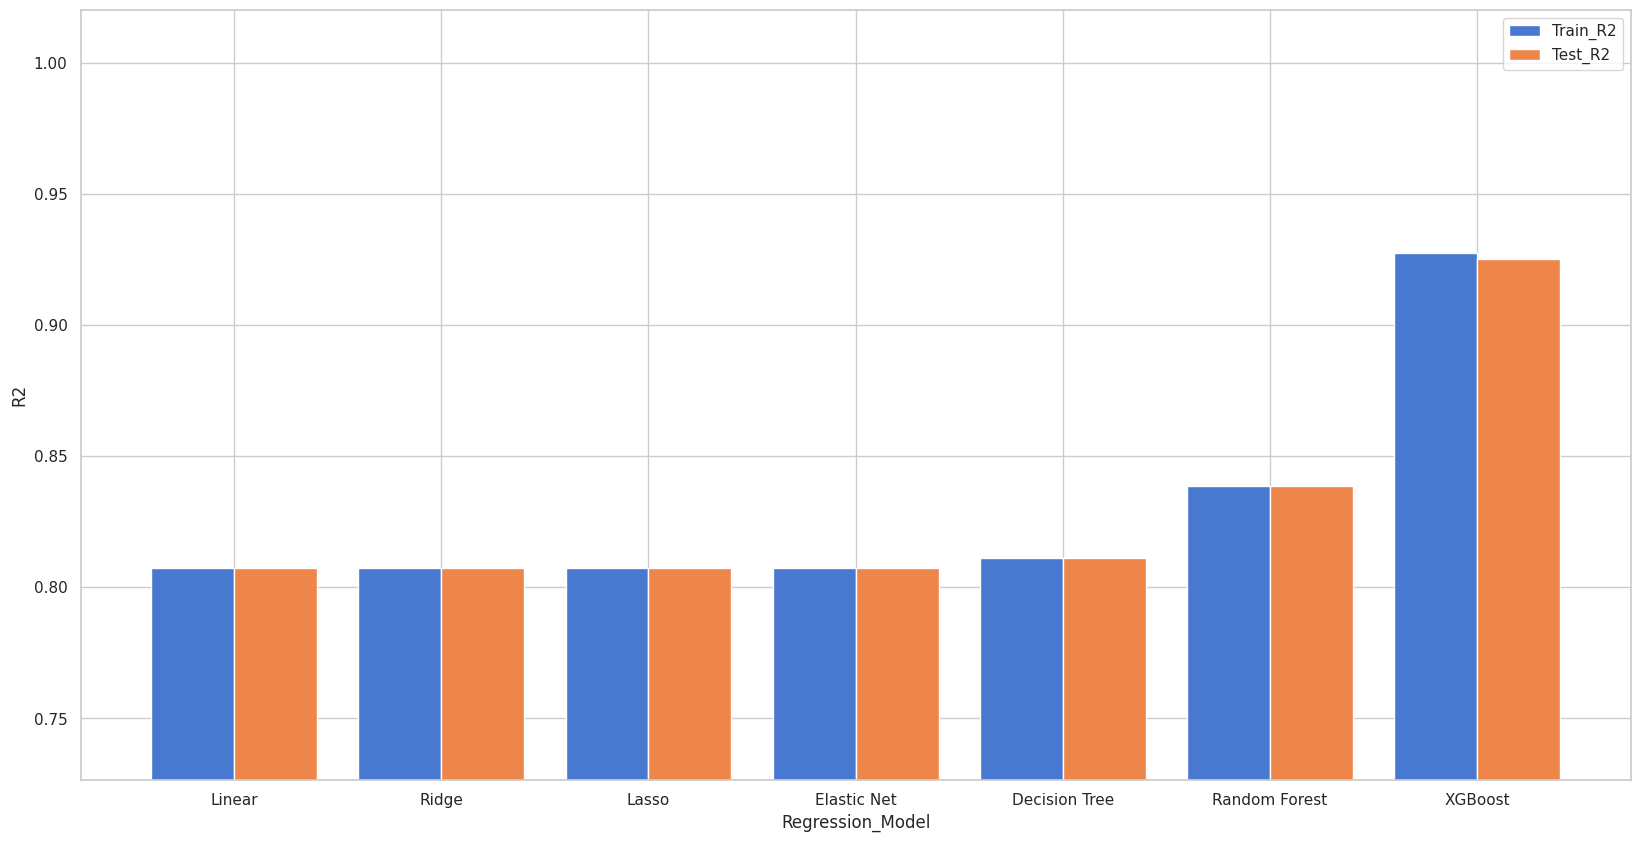

In [302]:
# plot bar graph to show R2 scores
plot_bar_graph_with_three_features(metrics_table, 'Regression_Model', 'Train_R2', 'Test_R2', 'R2')

The model built using XGBoost algorithm has the highest R2 score, followed by the one using random forest and decision tree.

# Conclusion

### Conclusions from EDA

1. Mondays have most sales since most of the Sundays are closed.
2. Promotions seem to have a significant effect on sales but not for the number of customers. It is advisable to spend more on promos to get higher returns.
3. Store type b has higher sales and customers per store than other store types. More Store type b must be opened.
4. Assortment b is available only at store type b and it has more sales and customers than any other assortment. More assortment b must be stocked to meet the demands of customers.
5. Weekly sales and customers peak at the mid-December. It may be guessed that people buy drugs in advance just before the shops close for the holiday season.

### Conclusions from Modelling

1. The model built using XGBoost algorithm is the most accurate one. This can be attributed to higher number of categorical features in the data.
2. If model interpretability is more important than accuracy, model built using decision tree algorithm should be chosen over the one using random forest algorithm.  
3. Decision tree based algorithms are slightly more accurate than linear regression based algorithms.